# 지속가능한 식수 사업을 위한 탄자니아 수도 펌프 작동 여부 분류 프로젝트
## Water Pump Functionality Prediction Project for sustainable water supply in Tanzania
<img src="img/pumping.jpg" width="600" height="300" /> 

## Outline

- Objective: How to solve a problem of unsustainable water supply service?
- The Data
- Challenges
    - missing values
    - high cardinality
    - data imbalance
- Final Model : random forest classifier
- Exploratory Data Analysis
- Prediction & Feature Importance
- Conclusion

image from [Drivendata](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/)

## Objective : How to solve a problem of unsustainable water supply service?
어떤 요인들이 고장난 식수 펌프 작동 고장에 영향을 주는 것일까?

- 목적: 식수 펌프가 언제 지어졌는지, 누가 관리를 해오고 있는지, 무엇으로 지어졌는지, 지어진 지역/마을의 정보, 물의 질과 양 등의 40개의 각 식수 펌프에 대한 피쳐들로 식수 펌프의 작동 여부 예측하여 어떤 피쳐가 가장 큰 영향을 주는지를 알아보자

- Objective: Predict one of three garget classes ('funcional', 'functional needs repair', 'nonfunctional') based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed, and more.


- 백그라운드 : 2009년도 UNICEF 데이터에 따르면 이남 아프리카 (sub-Saharan Africa) 에 매년 60,000개 정도의 식수 펌프가 다양한 비영리단체/ 국제기구/ 정부단체에 의해 지어진다 (Sansom and Koestler 2009). 하지만 [Rural Water Supply Network](www.rural-water-supply.net)에 의하면 이렇게 식수 사업으로 아프리카에 설치된 식수펌프 중 30-40%가 작동 하지 않는다. 세계 은행 [World Bank](https://www.theguardian.com/global-development-professionals-network/2016/mar/22/how-do-you-solve-a-problem-like-a-broken-water-pump)은 약 12억 달러의 투자금이 지난 20여년 동안 고장나서 버려진 식수 펌프로 인해 낭비되어왔다고 예측한다. 전문가들은 쉽게 망가지는 식수 펌프에 영향을 주는 요인을 크게 3가지로 보고 있다. (1) 식수 펌프가 저렴한 금속으로 해외에서 제작되어 오기에 고장 나기 쉽다. (2) 식수 펌프와 지하수를 연결하기 위해 드릴을 하는 장소가 잘못 되었거나, 잘못된 방법으로 드릴을 했기 때문이며, (3) 지속적으로 관리를 해주는 on site supervisor가 존재하지 않기 때문이라고 말한다. 주어진 데이터를 통해 어떤 요인들이 식수 펌프 작동에 큰 영향을 주는지를 알아보는 것이 이 프로젝트의 목적이다. 

- Background : According to a study conducted in 2009 by UNICEF, around 60,000 handpumps are installed across sub-Saharan Africa every year. However, about 30 to 40% of those in the region do not work at any one time. The World Bank estimated that over the last 20 years, waterpump failure represents a loss of investment of more than 1.2 billion dollar. Experts point at 3 major reasons behind water pump failure. First, most waterpumps are manufactured with poor quality metal outside of the region (usually manufactured in India), which makes it hard to enforce quality control. Moreover, water pumps stop working because the borehole which a pump extracts groundwater through was drilled in the wrong place or the wrong way. Lastly, a lack of on site supervisors and skilled drillers exacerbates the problem of unsustainable water supply service. Therefore, given a set of variables of the data, I would like to explore which factors affect the functionality of water pumps the most. 

Reference: [The Guardian](https://www.theguardian.com/global-development-professionals-network/2016/mar/22/how-do-you-solve-a-problem-like-a-broken-water-pump)

## The Data
#### Source : DrivenData, Basic Statistics Portal of Tanzania 
사용된 데이터는 [Drivendata](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/)에서 현재 competition 진행 중인 데이터이며, [Taarifa](http://taarifa.org/)라는 크라우드 소싱 리포팅 오픈 소스 플랫폼과 탄자니아 정부에서 제공한 탄자니아에 지어진 59,400개의 식수 펌프 데이터 이다. 또한, 누락 데이터로 인한 정보의 손실을 탄자니아 통계 포털 [Basic Statistics Portal](http://statistics.go.tz/dataset/idadi-ya-watu-kwa-ngazi-ya-vijiji-mtaa-kwa-sensa-ya-mwaka-2012) 에서 2012년도 마을 별 인구 자료를 사용하여 변환하였다. 

The data comes from [Drivendata](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/), which is provided by [Taarifa](http://taarifa.org/) (an open source platform for the crowd sourced reporting and triaging of infrastructure related issues) and the Tanzanian Ministry of Water. Additionally, in order to impute missing values, I used a 'villaage-statistics' data of 2012 from [Basic Statistics Portal](http://statistics.go.tz/dataset/idadi-ya-watu-kwa-ngazi-ya-vijiji-mtaa-kwa-sensa-ya-mwaka-2012).

#### Feature information : 
| type | name | count |
|-|-|-|
| string | date recorded, funder, installer, managing group, quality, name of pump, geographic location (region, lga, ward, village), recorded by, extraction type, group, and class, payment, quality, source, water point type |  29 |
| int | construction year, quantity, population, region code, district code, id | 7 
| float | longitude, latitude, amount of water, height of pump | 3 |
| Boolean | permit |1 |
| &nbsp;| &nbsp;| 40 |


`amount_tsh` - 우물에 있는 물의 양, amount of water   
`date_recorded` - 데이터가 기록된 날짜 (년/월/일), The date the row was entered   
`funder` - 우물 설치 자금 지원자/기관, Who funded the well   
`gps_height` - 우물의 높이, Altitude of the well  
`installer` - 우물 설치자/기관, Organization that installed the well  
`longitude` - 경도  
`latitude` - 위도  
`wpt_name` - 우물 이름, Name of the waterpoint if there is one  
`num_private` - 정보 없음, no information available for this feature    
`basin` - 가까운 분지, Geographic water basin  
`subvillage` - 서브빌리지, subvillage   
`region` - 지역, Geographic location  
`region_code` - 지역 코드, Geographic location (coded)   
`district_code` - 지구 코드, Geographic location (coded)   
`lga` - 지방 정부, Local Government Authorization  
`ward` - 행정 구역, Geographic location  
`population` - 우물 주변 인구 수, Population around the well  
`public_meeting` - 우물 주변이 마을 모임 장소로 열리는지 유무, True/False  
`recorded_by` - 작성자/기관, Group entering this row of data  
`scheme_management` - 우물 운영 기관, Who operates the waterpoint  
`scheme_name` - 우물 운영 기관, Who operates the waterpoint  
`permit` - 우물의 허가증 유무, If the waterpoint is permitted  
`construction_year` - 우물 지어진 년도, Year the waterpoint was constructed  
`extraction_type` - 펌프 종류, The kind of extraction the waterpoint uses  
`extraction_type_group` - 파이프 종류, The kind of extraction the waterpoint uses   
`extraction_type_class` - 파이프 종류, The kind of extraction the waterpoint uses   
`management` - 우물 운영 기관, How the waterpoint is managed   
`management_group` - 우물 운영 기관, How the waterpoint is managed   
`payment` - 우물 관리 비 지불 방식, What the water costs   
`payment_type` - 우물 관리 비 지불 방식, What the water costs  
`water_quality` - 물의 질, The quality of the water  
`quality_group` - 물의 질, The quality of the water  
`quantity` - 물의 양, The quality of the water  
`quantity_group` - 물의 양, The quality of the water  
`source` - 식수원, The source of the water  
`source_type` - 식수원, The source of the water  
`source_class` - 식수원, The source of the water  
`waterpoint_type` - 펌프 종류, The kind of waterpoint  
`waterpoint_type_group` - 펌프 종류, The kind of waterpoint  

#### Target - 3 classes

In [1]:
df = pd.read_csv('data/training.csv')
target = pd.read_csv('data/labels.csv')
df = df.join(target.set_index('id'), on='id')
test = pd.read_csv('data/test.csv')
pop_for_merge = pd.read_csv('data/pop_for_merge.csv')
pop_median = pd.read_csv('data/pop_median.csv')

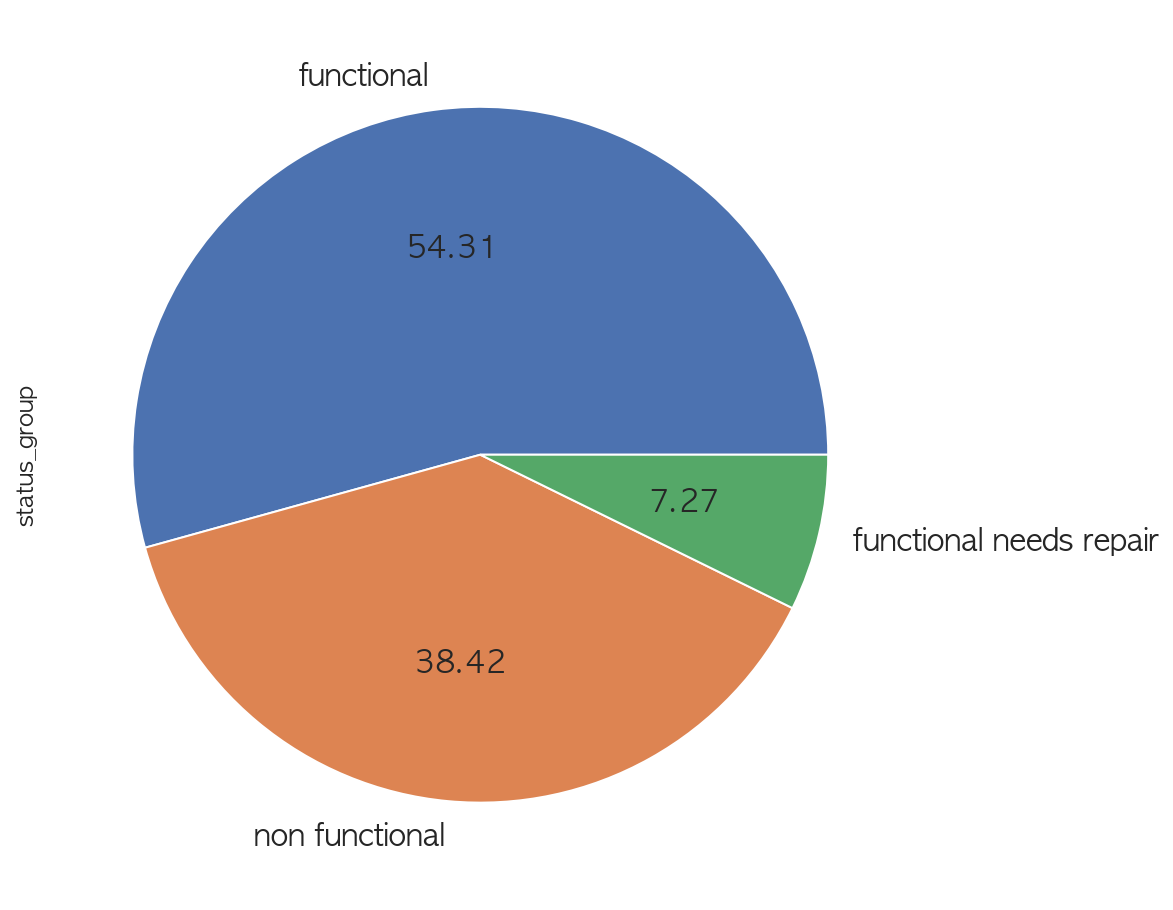

In [68]:
target.status_group.value_counts(normalize=True).plot.pie(autopct='%.2f', fontsize=15, figsize=(8, 8))
plt.show()

## Summary: 

- 중요한 요소
- 지속적 관리를 할 수 있는 방안 : 빠른 캐치, 그냥 짓고 빠지는 것이 아닌 local community를 교육 시킨다거나 요즘 기술

## Final Model - Random Forest Classifier
- 예측 모델은 피쳐의 중요도를 쉽게 파악할 수 있고 이해하기 쉬운 tree-based 모델인 Random Forest Classifier 사용

- 사용된 피쳐: 
       ['funder', 'installer', 'basin', 'region_code', 'district_code', 'lga',
       'ward', 'public_meeting', 'permit', 'construction_year',
       'extraction_type_class', 'management', 'payment', 'water_quality',
       'quality_group', 'quantity', 'source_class', 'waterpoint_type',
       'population', 'date_recorded_year', 'season', 'clustered_space']
       
- `class weight: {'functional' : 0.25, 'functional needs repair' : 0.5, 'not functional' : 0.25}`

<img src="img/final_model.png" width="700" height="500" />

- Evaluation
<img src="img/evaluation.png" width="600" height="300" />

## Challenges
1. Missing values 누락 데이터
2. High Cardinality
3. Data imbalance 데이터 비대칭

1. Missing values 누락 데이터
    - 누락 데이터는 NaN이라고 되어있는 피쳐도 있었지만, 그렇지 않은 경우도 있었다. 예를들어 population 또는 GPS Height과 같은 경우, population이 0이나 1인경우, height이 0이거나 0보다 작은 값이 존재 하였다. 

In [10]:
# Categorical data 중 missing value 가 있는 피쳐
null_list = []
for col in df.columns:
    if df[col].isnull().sum() !=0:
        null_list.append(col)

miss_df = df[null_list]
miss_df.shape

(59400, 7)

In [11]:
df.isnull().sum().sort_values(ascending=False).head(10)

scheme_name          28166
scheme_management     3877
installer             3655
funder                3635
public_meeting        3334
permit                3056
subvillage             371
ward                     0
lga                      0
district_code            0
dtype: int64

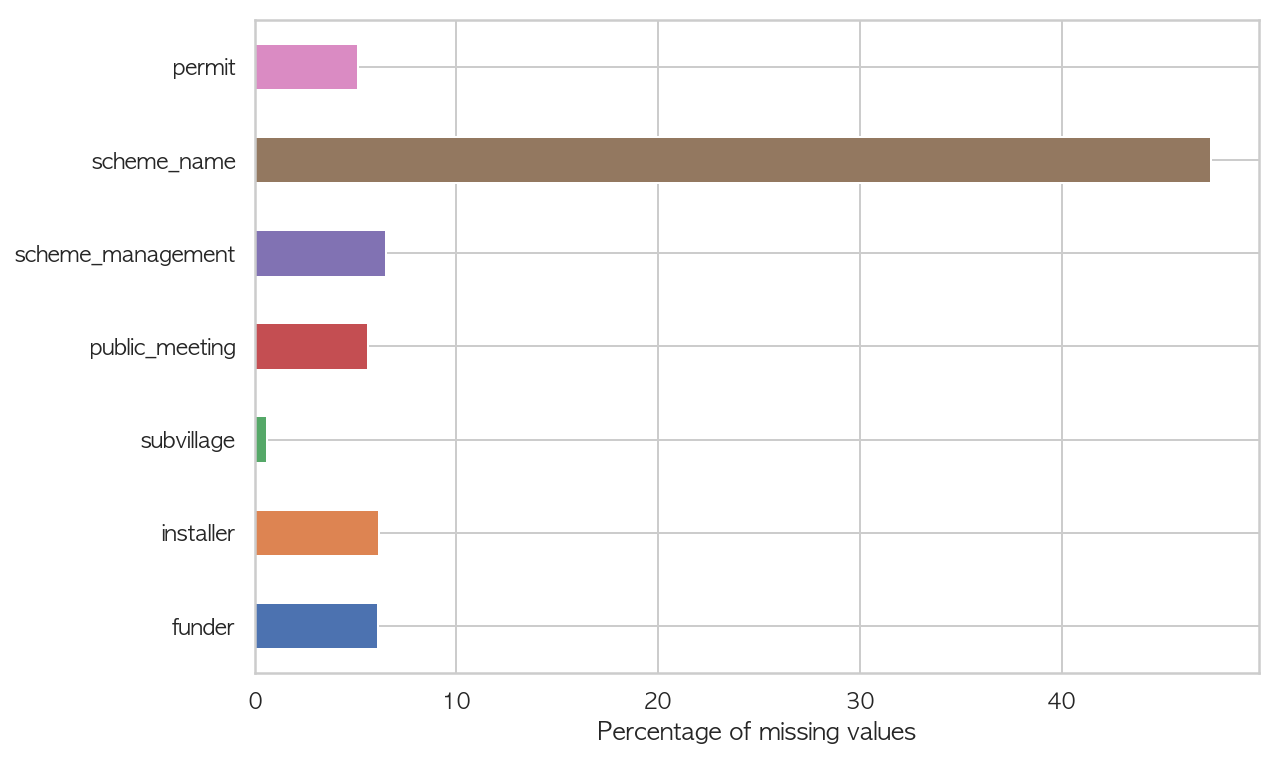

In [12]:
# missing value 처리해 주어야 하는 columns
((miss_df.isnull().sum()/miss_df.shape[0])*100).plot(kind='barh', figsize=(9,6))
plt.xlabel('Percentage of missing values')
plt.show()

2. High Cardinality
    - 정수로 되어있는 data type중에서도, category에 속하는 피쳐 (region code, district code, construction year, date recorded)
    - funder와 installer 피쳐의 경우, 각각 1897, 2145개의 카테고리 값 존재
    - subvilage의 경우 19287개의 카테고리 값 존재
    - wpt_name (우물의 이름)의 경우 37400개의 카테고리 값 존재

In [40]:
numerical_cols = ['population', 'longitude', 'latitude', 'gps_height', 'date_recorded', 'amount_tsh', 'id']
for col in df.columns:
    if col not in numerical_cols:
        print("{} feature unique values: {}".format(col, df[col].nunique()))

funder feature unique values: 1897
installer feature unique values: 2145
wpt_name feature unique values: 37400
num_private feature unique values: 65
basin feature unique values: 9
subvillage feature unique values: 19287
region feature unique values: 21
region_code feature unique values: 27
district_code feature unique values: 20
lga feature unique values: 125
ward feature unique values: 2092
public_meeting feature unique values: 2
recorded_by feature unique values: 1
scheme_management feature unique values: 12
scheme_name feature unique values: 2696
permit feature unique values: 2
construction_year feature unique values: 55
extraction_type feature unique values: 18
extraction_type_group feature unique values: 13
extraction_type_class feature unique values: 7
management feature unique values: 12
management_group feature unique values: 5
payment feature unique values: 7
payment_type feature unique values: 7
water_quality feature unique values: 8
quality_group feature unique values: 6
qua

3. Data imbalance 데이터 비대칭 
    - functional needs repair (작동하나 수리 필요)의 경우, 전체 데이터의 7.27%

## Exploratory Data Analysis
1. 데이터 정제:
    - 결측값 채우기
    - 반복되는 피쳐 지우기
2. Target값 과의 상관관계 분석하여 피쳐 선택
    - (categorical variable) Chi square test 
    - (continuous variable) logistic regression
3. 새로운 피쳐 만들기 
----
1. Data cleaning:
    - missing value mitigation
    - drop duplicate columns
2. Explore data relationships 
    - (categorical variable) Chi square test 
    - (continuous variable) logistic regression
3. Identification and creation of features

In [2]:
import pandas as pd
import numpy as np
import scipy
import pickle
from string import punctuation
from feature_importance import *
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer
from scipy.stats import gaussian_kde
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from preprocessing_data import *
pd.set_option('max_rows', 200, 'max_columns', 100)
pd.set_option('max_colwidth', 100)
import matplotlib.pyplot as plt
%matplotlib inline

### 1. 데이터 정제 Data Cleaning

#### 결측치로 인해 drop해야 하는 피쳐들 (features that need to be dropped due to high percentage of missing values):
`amount_tsh`, `subvillages`, `gps_height`, `wpt_name`, `num_private`, `recorded_by`

`amount_tsh` : 물의 양
- 70%의 데이터가 missing value이므로 사용하지 않는다

In [35]:
len(df[df.amount_tsh == 0.00])/ len(df)

0.700993265993266

In [ ]:
df.drop('amount_tsh', axis=1, inplace = True)

`wpt_name` : 펌프의 이름
- drop:
    - high cardinality: 카테고리 값이 총 37,400개 이다
    - data imbalance : 이름이 있는 펌프와 없는 첨프의 차이가 약 15배 정도 이기에 제외

In [95]:
# 카테고리 값의 갯수 
df.wpt_name.nunique()

37400

In [20]:
# data imbalance : huge gap between those with name and without name
pd.crosstab(index=df['wpt_name']=='none', columns = df["status_group"])

status_group,functional,functional needs repair,non functional
wpt_name,,,
False,29629,4241,21967
True,2630,76,857


`num_private` : 99%의 데이터가 0이므로 제외

In [24]:
len(df[df.num_private==0])/len(df)

0.9872558922558923

`recorded_by`: 1개의 value만 존재

In [26]:
df.recorded_by.nunique()

1

----------------------

### 2. Explore data relationships Target값 과의 상관관계 분석하여 피쳐 선택

##### date_recorded (yyyy-mm)
- 아프리카 대륙은 강수량과 기후변화에 따라 식수 공급 및 농업 생산성 큰 영향을 받는 나라
- 년도와 월로 따로 분리를 하여 피쳐를 생성
- 월의 경우, `season` 피쳐로 바꾸어 건기인지 우기인지를 표시. 건기와 우기 정보는 [Expert Africa](https://www.expertafrica.com/tanzania/weather-and-climate) 참조

In [59]:
df["date_recorded_year"] = df.date_recorded.apply(lambda date: int(date.split("-")[0]))
df["date_recorded_month"] = df.date_recorded.apply(lambda date: date.split("-")[1])
df["date_recorded_month"] = df.date_recorded_month.apply(lambda month: int(month[1]) if month[0] == '0' else int(month))

In [61]:
def season(n):
    if n>=3 and n<=5:
        return 'long rains'
    elif n>=6 and n<=10:
        return 'long dry'
    elif n>=11 and n<=12:
        return 'short rains'
    else:
        return 'short dry'

In [62]:
df['season'] = df["date_recorded_month"].apply(lambda x: season(x))

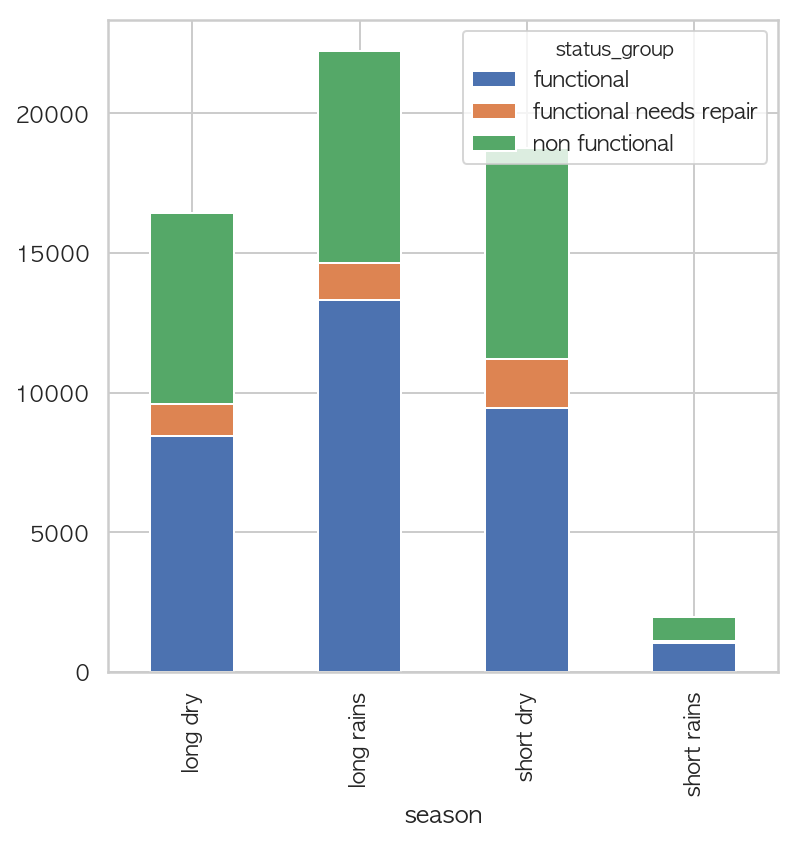

In [66]:
season = pd.crosstab(index=df.season, columns = df["status_group"])
season.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)
plt.show()

In [67]:
season

status_group,functional,functional needs repair,non functional
season,,,
long dry,8462,1137,6833
long rains,13310,1348,7584
short dry,9456,1741,7559
short rains,1031,91,848


In [68]:
# chi square test for the variable 'season' // 새로 생성한 'season' variable의 statistical difference test
sp.stats.chi2_contingency(season)

(553.3452751877359,
 2.683131807180141e-116,
 6,
 array([[ 8923.90383838,  1194.22464646,  6313.87151515],
        [12079.20333333,  1616.47666667,  8546.32      ],
        [10186.02363636,  1363.12545455,  7206.85090909],
        [ 1069.86919192,   143.17323232,   756.95757576]]))

In [60]:
# drop the columns that are not useful anymore // 필요없는 column drop
df.drop(columns='date_recorded', axis=1, inplace=True)
df.drop(columns='date_recorded_month', inplace = True, axis=1)

##### construction_year : 펌프가 지어진 년도
- 누락 데이터가 0으로 표기되어 있음 (전체 데이터의 35%)
- 누락데이터 처리 : 같은 installer와 funder끼리 비슷한 construction_year을 가질 것이라는 가정 하에, missing value를 각 installer 혹 funder의 construction year 최빈값으로 처리
- 위의 누락 데이터 처리 나머지는 전체 column의 최빈값으로 처리 (median으로도 하여 비교 해 보았으나, mode가 더 나은 성능을 보여줌)


- 35% of the data is missing value
- missing value imputation: assuming that those with the same installer or funder have similar construction year, I used mode of each installer and funder's construction year to impute missing values
- For missing values left even after above step, I imputed with the column's mode value

In [23]:
# percentage of missing value: 35%
len(df[df.construction_year == 0]) / len(df)

0.34863636363636363

In [100]:
def impute_construction_yr(df):
    df.loc[df['construction_year'] == 0,'construction_year'] = np.nan
    df['construction_1'] = df.groupby(['installer'], sort=False)['construction_year']\
                .apply(lambda x: x.fillna(scipy.stats.mode(x)[0][0]))
    df['construction_year'] = df.groupby(['funder'], sort=False)['construction_1']\
                .apply(lambda x: x.fillna(scipy.stats.mode(x)[0][0]))
    df.drop('construction_1', axis=1, inplace = True)
    
    return df

In [101]:
df = impute_construction_yr(df)

In [76]:
# imputation 한 후, missing value 비율 // 0.08% is the percentage of missing value after imputation
df.construction_year.isnull().sum() / len(df)

0.0877946127946128

In [ ]:
# 나머지는 컬럼의 최빈값으로 채워 넣어 준다 // missing value imputation with the column's mode value
df['construction_year'].fillna(df['construction_year'].mode()[0], inplace=True)

In [103]:
enc = OneHotEncoder(handle_unknown='ignore')
construction_year_value = enc.fit_transform(np.array(df['construction_year']).reshape(-1, 1)).toarray()
 
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))

clf = BernoulliNB()
clf.fit(construction_year_value, y).predict(construction_year_value)
clf.score(construction_year_value, y)

0.5934848484848485

##### permit

In [62]:
df.permit.value_counts(dropna = False)

True     38852
False    17492
NaN       3056
Name: permit, dtype: int64

In [63]:
# 최빈값으로 missing value imputation
df.permit.fillna(True, inplace = True)

In [64]:
df.permit.value_counts()

True     41908
False    17492
Name: permit, dtype: int64

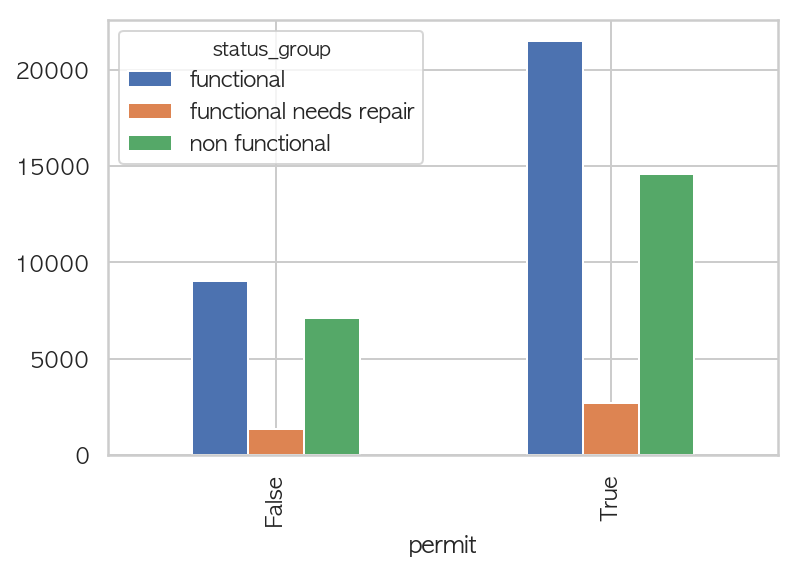

In [61]:
permit = pd.crosstab(index=df['permit'], columns = df["status_group"])
permit.plot(kind="bar")
plt.show()

In [66]:
obs = permit.values
chi2, p, dof, ex = sp.stats.chi2_contingency(obs) 
print("p-value = {}".format(p))

p-value = 1.5416464629999488e-15


##### payment type 
- 재정 상황은 대부분의 경우 중요한 변수가 된다. 아래 `never pay`에 non functional이 집중적으로 많다는 것을 확인 할 수 있다.
- `payment`와 `payment_type`은 완전하게 같은 feature이므로 `payment`는 제외  
- Most of the time, whether or not a funder consistently puts ts resources in to maintaining its service greatly influences the operation status. Below plot indeed shows that the value `never pay` has the most non-functional pumps.
- `payment` and `payment_type` are duplicates.

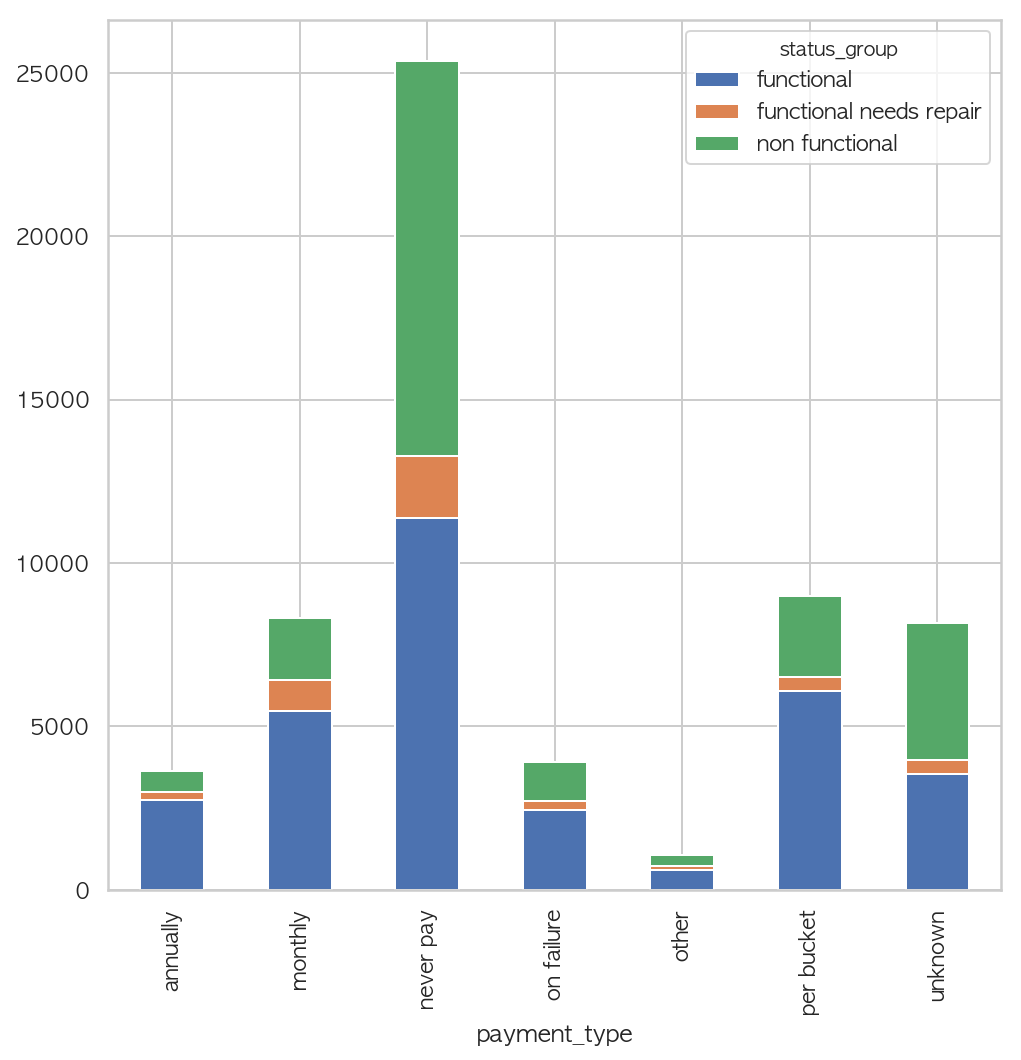

In [42]:
payment_type_table = pd.crosstab(index=df["payment_type"], 
                          columns=df["status_group"])

payment_type_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.show()

##### funder & installer : 
사람이 직접 입력한 데이터 이기에 카테고리 값이 일정하지 못하며, 오타가 많다  
   - ex) 같은 `World Vision`이 다양한 형태로 등장:
       World Vision, World Vision/ Kkkt, World Vision/adra, World Vision/rc Church, world vission, world visiin, Worldvision
    
- Data cleaning steps: 누락데이터 처리만 한 데이터를 기준으로 두고 아래의 step을 반복하며 naive bayes classifier로 성능 확인
        1. 눈에 띄는 카테고리 오타 정리

Since values are manually inputted by humans, these values are not consistent and contain typos
   - ex) many different types of World Vision:   
       World Vision, World Vision/ Kkkt, World Vision/adra, World Vision/rc Church, world vission, world visiin, Worldvision
        
- Data cleaning steps: let base line be missing value imputation only. Then, I I repeated below steps to get optimal result on naive bayes classifier (bernoulli)
        (1) correct typo (only major installer/funder)  
        ex) "oxfam" is one of the major international organizations. Therefore I knew that "oxfarm" is a typo.

In [76]:
pd.crosstab(index=df.funder, columns = df["status_group"]).head(10)

status_group,functional,functional needs repair,non functional
funder,,,
0,445,3,329
A/co Germany,7,1,7
Aar,22,4,7
Abas Ka,1,0,0
Abasia,36,2,5
Abc-ihushi Development Cent,0,0,1
Abd,5,0,2
Abdala,0,0,1
Abddwe,1,0,0


In [77]:
pd.crosstab(index=df.installer, columns = df["status_group"]).tail(10)

status_group,functional,functional needs repair,non functional
installer,,,
villigers,1,0,0
wanan,47,2,3
wananchi,94,8,17
wananchi technicians,1,0,0
wasab,1,0,0
water board,0,0,2
wizara ya maji,2,0,0
world,0,1,3
world banks,0,0,1


##### longitude & latitude
- 누락 데이터 처리 및 새 피쳐 생성:
    - 아래의 scatter plot을 보면 누락값이 왼쪽 상단에 보여진 다는 것을 확인
    - `lga`가 'Bariadi', 'Geita', 'Magu'인 데이터만 longitude 와 latitude가 누락되었다는 것을 확인하고 직접 누락값 입력 
    <img src="img/long_lat_outlier.png" width="800" height="400" />
    - dbscan 클러스터링 방법을 통해 새 피쳐 생성
    
    
- missing value imputation & feature creation:
    - missing value imputation: above scatter plot shows outliers (missing values). 
    - Upon finding out that data with `lga` values of 'Bariadi', 'Geita', 'Magu' miss longitude and latitude data, I inputted longitude and latitude manually for missing values
    - created new feature with longitude and latitude using dbscan clustering method


In [61]:
# missing value imputation
loc_dict = {'Bariadi': [33.983333, -2.8000], 'Geita' : [32.25, -2.916667], 'Magu': [33.433333, -2.583333]}
long_0 = list(int(i) for i in df[['lga', 'longitude', 'latitude']][df[['lga', 'longitude', 'latitude']].longitude == 0].index)

for i in long_0:
    if df.iloc[i].lga in loc_dict:
        lga_name = df.iloc[i].lga
        df.at[i, 'longitude'] = loc_dict[lga_name][0]
        df.at[i, 'latitude'] = loc_dict[lga_name][1]

In [64]:
location = df.loc[:,['latitude', 'longitude', 'status_group']]

In [65]:
location_non_func = location[location.status_group == 'non functional'].iloc[:,:2].reset_index(drop=True)
location_func = location[location.status_group == 'functional'].iloc[:,:2].reset_index(drop=True)
location_repair = location[location.status_group == 'functional needs repair'].iloc[:,:2].reset_index(drop=True)

- 누락 데이터 처리를 한 후, scatter plot이 Tanzania지도와 같은 모양임을 확인
- 대체적으로 작동하지 않는 펌프들은 외곽지역에 모여있는 것을 확인 할 수 있다 


- after imputing missing values, we can see that scatter plot looks just like the map of Tanzania 
- Below scatter plot shows that those non-functioning water pumps are concentrated in the borderline of Tanzania

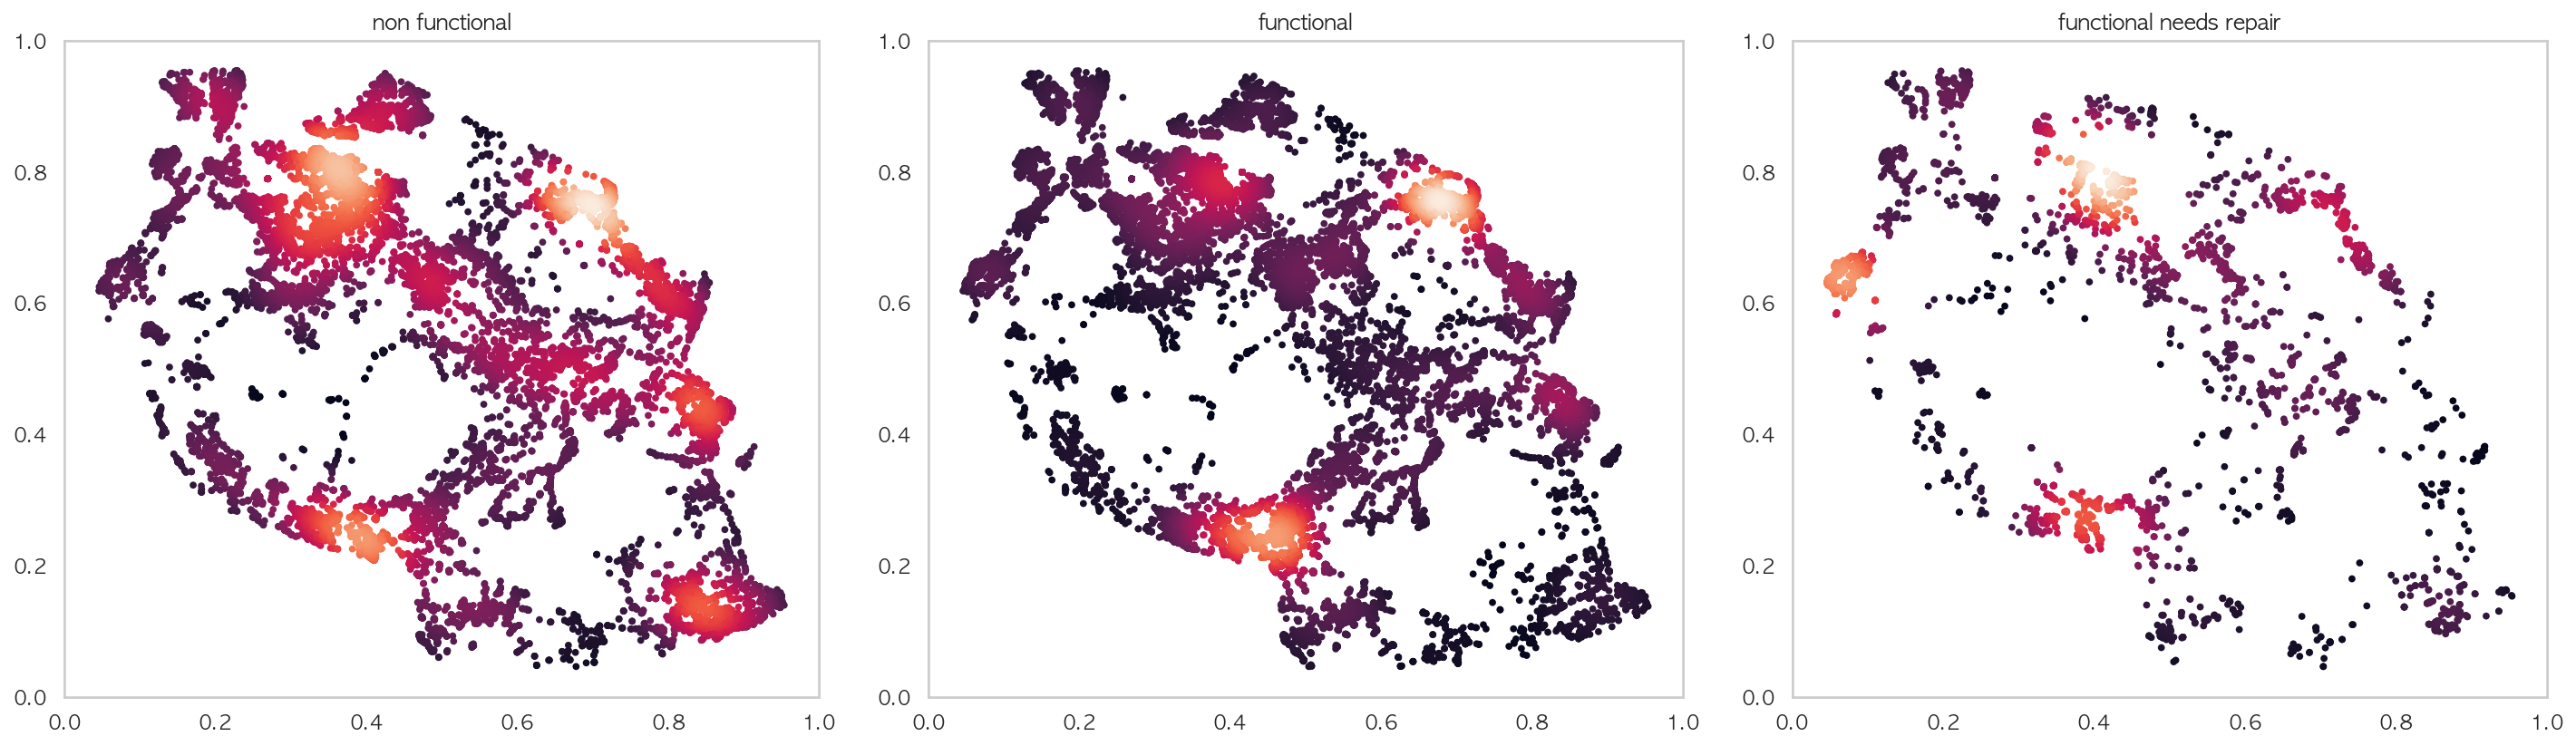

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

locations = [location_non_func, location_func, location_repair]
titles = ['non functional', 'functional', 'functional needs repair']

for i, data in enumerate(locations, 1):
    x = data.longitude
    y = data.latitude

    xy = np.vstack([data.longitude, data.latitude])
    z = scipy.stats.gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
# 밀도가 높은 지역은 밝게 표시되도록 데이터 sorting
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    ax = fig.add_subplot(1,3,i)
    ax.scatter(x, y, c=z, s=15, edgecolor='')
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    
    ax.grid(False)
    plt.title("%s" %
                  (titles[i-1]))
plt.tight_layout()
plt.show()

**Dbscan clustering**
- 원 중심으로부터의 거리를 재는 haversine metric을 사용해야 하기에 longitude와 latitude를 radian으로 바꾸어 주었으며, 또한 epsilon도 radian으로 바꾸어 주었다
- 탄자니아에 등록된 village는 2,682개이며, 더 작은 단위의 village는 약 64,691개 존재
- subvillage의 category값이 2만에 가까웠기에, subvillage feture를 쓰지 않고 dbscan을 사용하여 만든 피쳐 사용

- Since I am using [haversine metric](https://en.wikipedia.org/wiki/Haversine_formula), I changed longitude, latitude, and epsilon (a parameter for dbscan clustering) in radian.
- There are 2,682 registered villages in Tanzania, but there exist approximately 64,691 small unit villages
- Instead of using subvillage feature (which has around 20 thousand values, I use the feature created with dbscan clustering.

In [51]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
coords = df.as_matrix(columns=['latitude', 'longitude'])

In [30]:
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 9803


In [40]:
df['clustered'] = cluster_labels

In [ ]:
df.drop(columns=['longitude', 'latitude'], axis=1, inplace = True)

##### Region 지역

In [64]:
# 21개의 지역 존재 
df.region.nunique()

21

In [65]:
df.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [152]:
region = pd.crosstab(index=df.region, columns = df["status_group"]).values
sp.stats.chi2_contingency(region) # 다른 분포를 가진다 

(4794.6311261871515,
 0.0,
 40,
 array([[1819.32070707,  243.46717172, 1287.21212121],
        [ 437.18005051,   58.50479798,  309.31515152],
        [1195.32085859,  159.96156566,  845.71757576],
        [2875.06979798,  384.75080808, 2034.17939394],
        [1800.8559596 ,  240.99616162, 1274.14787879],
        [1529.31555556,  204.65777778, 1082.02666667],
        [2378.15085859,  318.25156566, 1682.59757576],
        [ 839.60292929,  112.35828283,  594.03878788],
        [ 859.69691919,  115.04732323,  608.25575758],
        [1069.32611111,  143.10055556,  756.57333333],
        [2519.35186869,  337.14752525, 1782.50060606],
        [2175.58171717,  291.14313131, 1539.27515152],
        [ 939.52979798,  125.73080808,  664.73939394],
        [1684.63666667,  225.44333333, 1191.92      ],
        [1431.01792929,  191.50328283, 1012.47878788],
        [ 981.89010101,  131.39959596,  694.71030303],
        [1433.73333333,  191.86666667, 1014.4       ],
        [2705.62858586,  362.0756

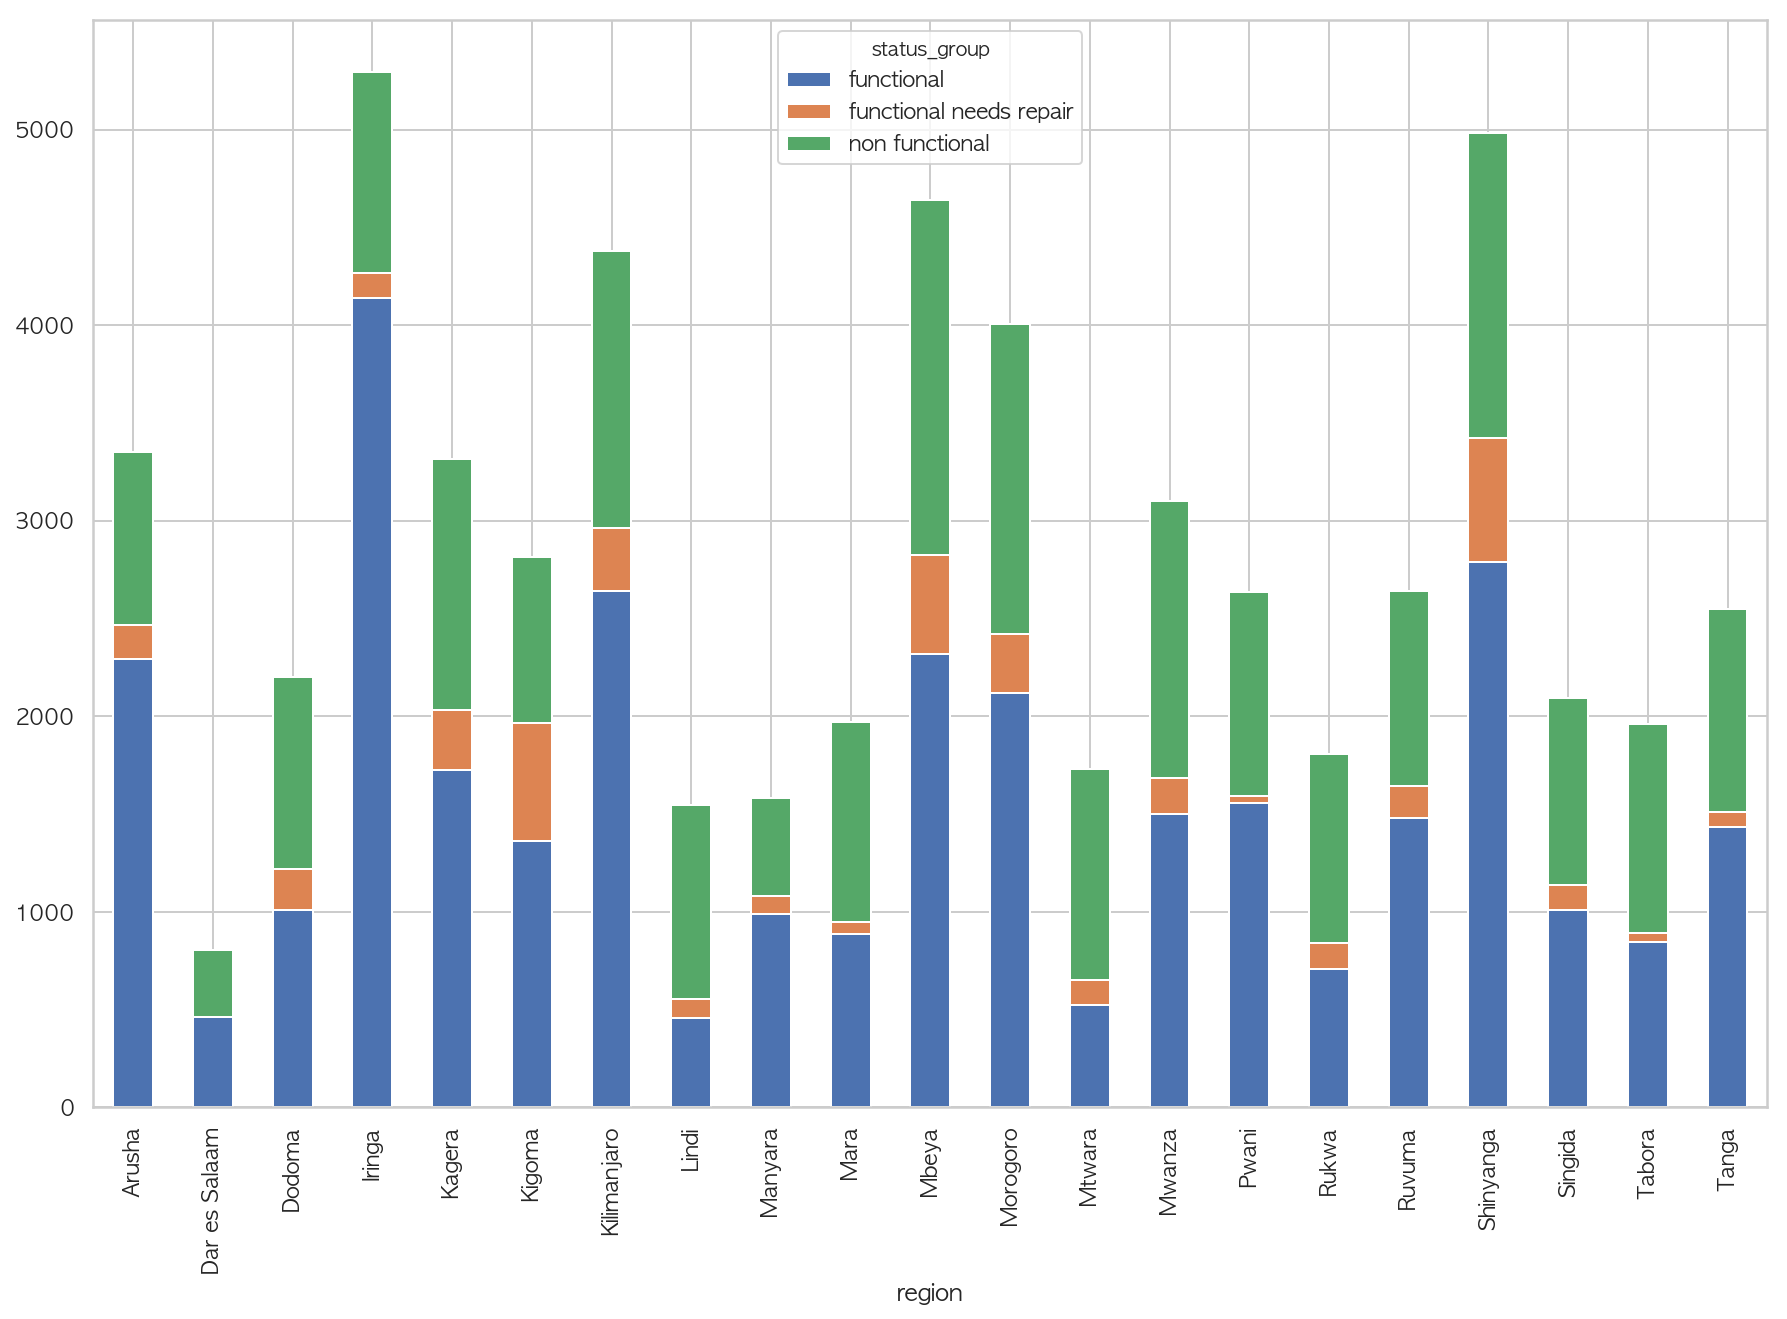

In [69]:
region.plot(kind="bar", 
                 figsize=(15,10),
                 stacked=True)
plt.show()

In [110]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["region"]).reshape(-1, 1))
region_value = enc.transform(np.array(df["region"]).reshape(-1,1)).toarray()

le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))

clf = BernoulliNB()
clf.fit(region_value, y).predict(region_value)
clf.score(region_value, y)

0.5717508417508418

##### basin - Geographic water basin 가까운 분지 

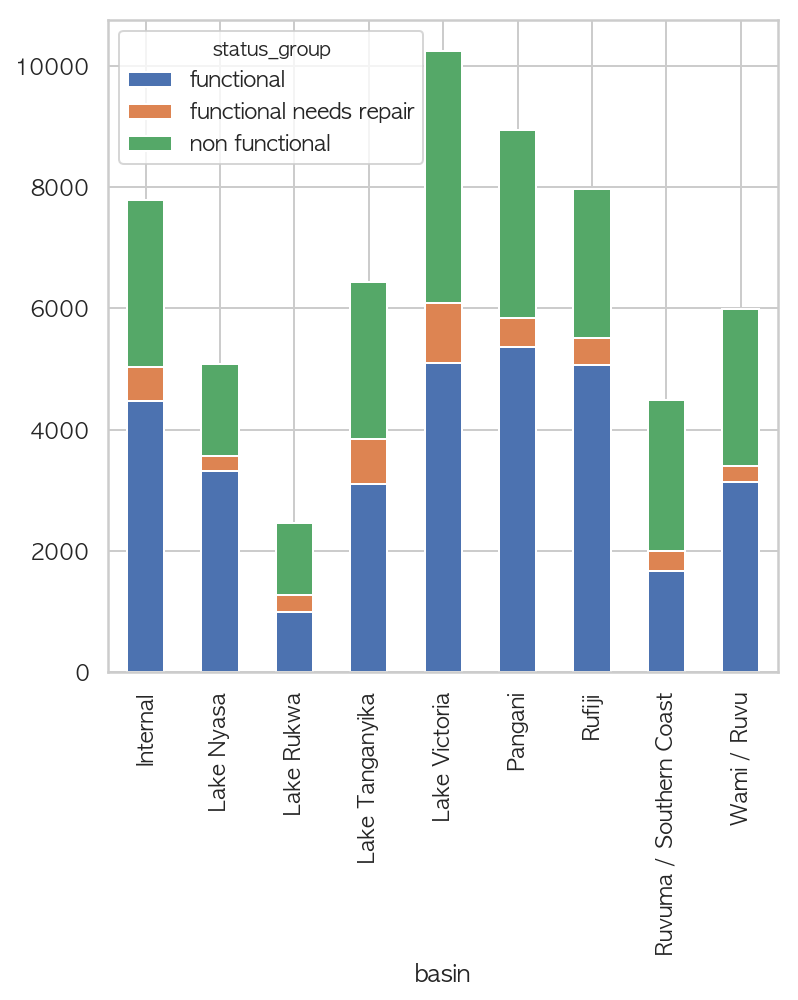

In [118]:
basin = pd.crosstab(index=df.basin, columns = df["status_group"])
basin.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)
plt.show()

In [119]:
basin = pd.crosstab(index=df.basin, columns = df["status_group"]).values
sp.stats.chi2_contingency(basin)

(1921.0342260111142,
 0.0,
 16,
 array([[4227.88409091,  565.78863636, 2991.32727273],
        [2761.56590909,  369.56136364, 1953.87272727],
        [1332.72030303,  178.34878788,  942.93090909],
        [3493.09575758,  467.4569697 , 2471.44727273],
        [5565.49212121,  744.79151515, 3937.71636364],
        [4855.14242424,  649.73030303, 3435.12727273],
        [4331.61252525,  579.66989899, 3064.71757576],
        [2440.06207071,  326.53671717, 1726.40121212],
        [3251.42479798,  435.11580808, 2300.45939394]]))

In [120]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["basin"]).reshape(-1, 1))
basin_value = enc.transform(np.array(df["basin"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
clf.fit(basin_value, y).predict(basin_value)
clf.score(basin_value, y)

0.5601010101010101

##### lga: Local Government Authority 지방 정부 지역

In [127]:
df.lga.nunique()

125

In [132]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["lga"]).reshape(-1, 1))
lga_value = enc.transform(np.array(df["lga"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
clf.fit(lga_value, y).predict(lga_value)
clf.score(lga_value, y)

0.6063299663299663

##### ward : 행정 구역

In [124]:
df.ward.nunique()

2092

In [134]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["ward"]).reshape(-1, 1))
ward_value = enc.transform(np.array(df["ward"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
clf.fit(ward_value, y).predict(ward_value)
clf.score(ward_value, y)

0.6763131313131313

##### population 
1) 누락값 처리: 
- 0또는 1인 값이 데이터의 절반이므로 Tanzania Basic Statistics Portal에서 빌리지 별 인구 데이터 `village-statistics.csv`를 사용하여 `population` 피쳐 대체

1) missing value mitigation: 
- Since 50% of the data is either 0 or 1, I looked for an outside source to impute missing value of the `population` 
- I used `village-statistics.csv` data from Tanzania Basic Statistics Portal to replace values of `population`

In [16]:
# population 피쳐의 48%가 0이나 1으로 누락값이 많다  // 48% of the feautre values are either 0 or 1
len(df[df.population==0| (df.population ==1)]) / len(df)

0.4782154882154882

- 2012년도 빌리지 단위 인구수 정보인 `village-statistics.csv`를 탄자니아 통계 포털 싸이트에서 다운받아 첫번째 전처리  
- `village-statistics.csv`의 District/Ward/Village와 주어진 `training.csv`의 region/lga/ward가 일치 하지 않으므로 2번째 전처리 과정을 거친 후, population 피쳐를 대체할 때 사용 할 두개의 dataframe 생성 `pop_for_merge.csv`, `pop_median.csv`
- 전처리 과정은 `population_preprocessing_1.py`, `population_preprocessing_2.py`에 기록


- I went through 2 data preprocessing steps for `village-statistics.csv` and created `pop_for_merge.csv` and `pop_median.csv` dataframes to replace the main dataframe's population column
- preprocessing steps are shown in `population_preprocessing_1.py` and `population_preprocessing_2.py`

In [13]:
vill_stat = pd.read_csv('village-statistics.csv', sep=',', engine='python', skiprows=1, usecols=[1,2,3,4])
vill_stat.head()

,District,Ward/Shehia,Village/Mtaa,Total Population
0,Kondoa,Bumbuta,Bumbuta,"3,107"
1,Kondoa,Bumbuta,Mahongo,"1,222"
2,Kondoa,Bumbuta,Mauno,"4,273"
3,Kondoa,Pahi,Pahi,"6,226"
4,Kondoa,Pahi,Potea,"2,396"


- after imputation, population column is within reasonable range

In [ ]:
pop_for_merge = pd.read_csv('pop_for_merge.csv', index_col = 0)
pop_median = pd.read_csv('pop_median.csv', index_col = 0)

In [ ]:
def clean_population(df):
    remove = ['Urban', 'District', 'City', 'Municipal', 'Town', 'Rural', 'Council', 'TC', 'Township']
    df.region = df.region.apply(lambda x: x.lower())
    df.lga = df.lga.apply(lambda x: [d for d in x.split(' ') if d not in remove])
    df.lga = df.lga.apply(lambda x: " ".join(x))
    df.lga = df.lga.apply(lambda x: [alpha for word in x for alpha in word if (alpha.isalpha() or alpha.isspace())])
    df.lga = df.lga.apply(lambda x: "".join(x).lower())

    df.ward = df.ward.apply(lambda x: [alpha for word in x for alpha in word if (alpha.isalpha() or alpha.isspace())])
    df.ward = df.ward.apply(lambda x: "".join(x).lower())
    
    main = df[['id','region', 'lga', 'ward', 'population']]
    merged = main.merge(pop_for_merge, on = ["ward", 'lga'], how = "inner")
    df = df.merge(merged[['id', 'population_y']], how='left')
    df.drop('population', axis = 1, inplace = True)
    df = df.merge(pop_median, on = 'lga', how = 'left')
    
    df["new_population"] = np.where(df.population_y.isnull(), df.population, df.population_y)
    df.drop(['population_y', 'population'], axis = 1, inplace = True)
    df = df.rename(index=str, columns={"new_population": "population"})
    return df


In [ ]:
clean_population(df)

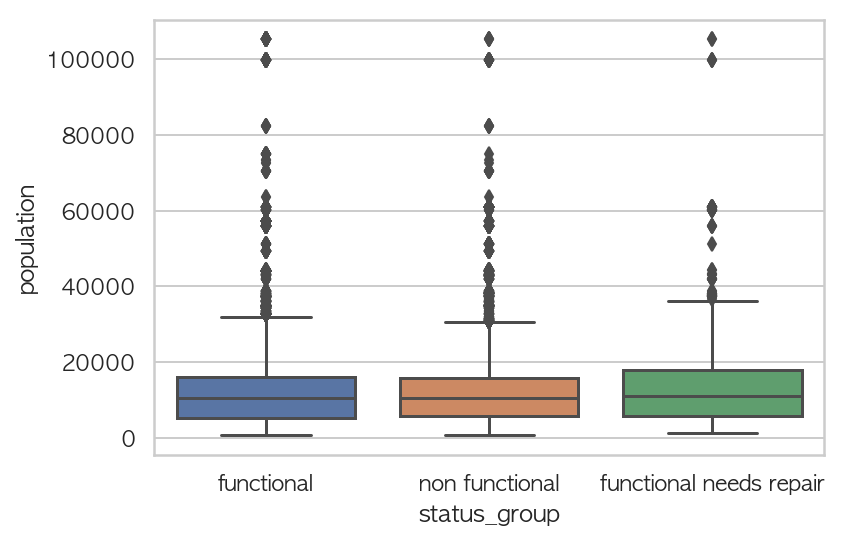

In [48]:
sns.boxplot(x = 'status_group', y='population', data = df)
plt.show()

##### public meeting 
- 모임이 우물 주변에서 열리는 경우가 대부분이므로 최빈값 True로 누락데이터 채우기
- Public meeting is held in most of the water pumps in our data.

In [46]:
df.public_meeting.value_counts(dropna=False)

True     51011
False     5055
NaN       3334
Name: public_meeting, dtype: int64

In [ ]:
df.public_meeting.fillna(True, inplace=True)

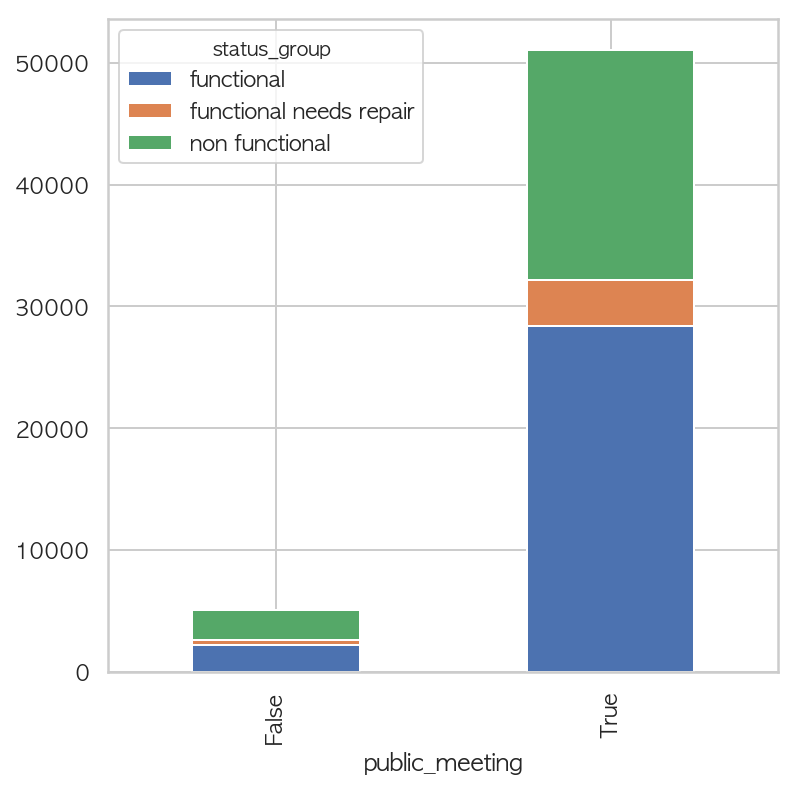

In [136]:
pm = pd.crosstab(index=df.public_meeting, columns = df["status_group"])

pm.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)
plt.show()

##### Extraction (multiple duplicates)
- `Extraction Type`, `Extraction Type_group`, `Extraction Type_class` 모두 같은 정보를 담은 피쳐이므로 가장 큰 설명력을 가진 피쳐인 `Extraction Type_class` 선택


- `Extraction Type`, `Extraction Type_group`, and `Extraction Type_class` are duplicate columns. I selected `Extraction Type_class` which has the best explanatory power out of 3 similar features

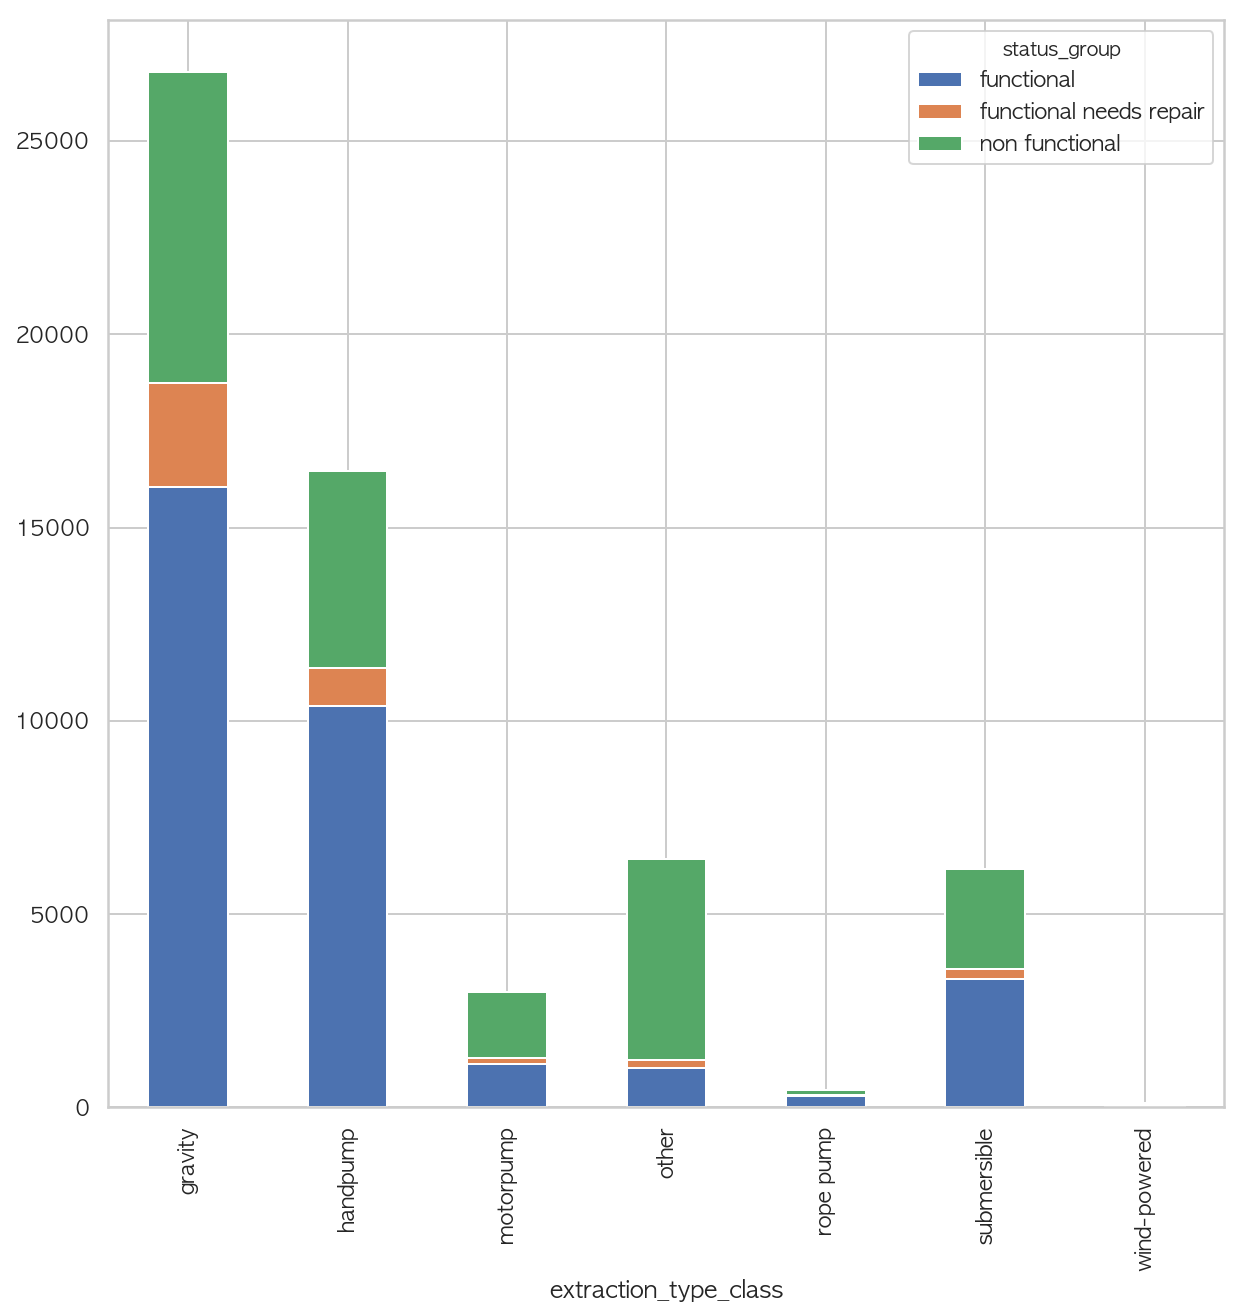

In [167]:
ext_class = pd.crosstab(index=df.extraction_type_class, columns = df["status_group"])
ext_class.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

In [168]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["extraction_type_class"]).reshape(-1, 1))
ext_class_value = enc.transform(np.array(df["extraction_type_class"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
clf.fit(ext_class_value, y).predict(ext_class_value)
clf.score(ext_class_value, y)

0.6231313131313131

##### management & management_group & scheme_management & scheme_name : duplicates 관리 기관
- `management_group`, `management`, `scheme_management`: 세개의 피쳐 모두 관리 기관의 종류에 대해 나타냄
    - 정부 기관인지, 개인인지, 회사인지와 같은 특징
    - `management_group`는 `management`를 포함하는 피쳐이고 `scheme_management`와 `management`는 비슷
    - `scheme_name`은 `management`하는 기관의 이름을 나타내며 2696개 값이 있는 카테고리 값이 큰 피쳐
    - 타겟값에 대한 설명력이 더 높은 피쳐인 `management` 선택

- `management_group`, `management`, `scheme_management`: three features all show different types of managing organizations
    - These features show whether a managing organization is an individual, government authority, or company 
    - `management`is a detailed version of `management_group`, and `scheme_management` is similar to `management` 
    - `scheme_name` shows the name of managing organization. It has 2696 unique value (high cardinality)
    - I selected `management` that has the highest explanatory power and has low cardinality

In [25]:
# scheme_name has high cardinality.
df.scheme_name.nunique()

2696

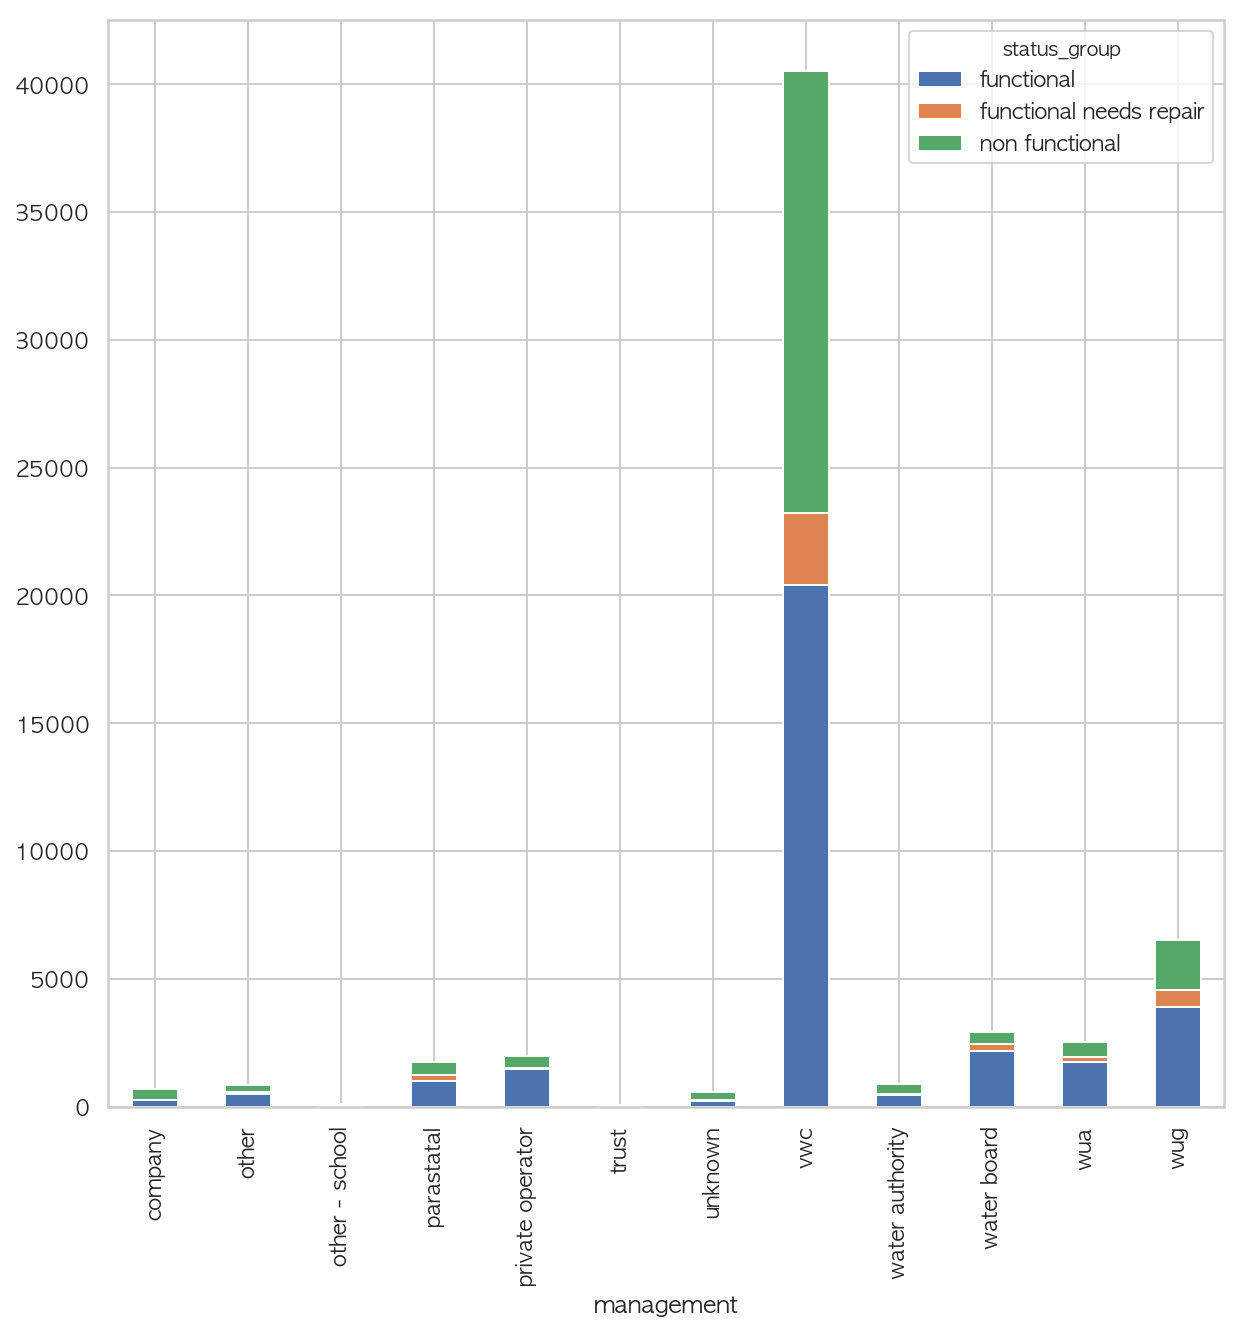

In [175]:
management = pd.crosstab(index=df.management, columns = df["status_group"])
management.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

In [39]:
# management 피쳐가 제일 높은 explanatory power를 가진다
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["management"]).reshape(-1, 1))
manag_value = enc.transform(np.array(df["management"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
clf.fit(manag_value, y).predict(manag_value)
clf.score(manag_value, y)

0.5476936026936027

In [177]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["management_group"]).reshape(-1, 1))
manag_value = enc.transform(np.array(df["management_group"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
clf.fit(manag_value, y).predict(manag_value)
clf.score(manag_value, y)

0.5445286195286195

In [13]:
df.scheme_management.fillna('None', inplace=True)
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df['scheme_management']).reshape(-1, 1))
manag_value = enc.transform(np.array(df['scheme_management']).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
clf.fit(manag_value, y).predict(manag_value)
clf.score(manag_value, y)

0.5440235690235691

##### water_quality & quality_group: duplicates
- naive bayes classifer로 성능이 조금 더 좋은 `water_quality` 피쳐 선택 
- chose `water_quality` column since it has higher explanatory power (via Naive Bayes classifier)

In [187]:
pd.crosstab(index=df.water_quality, columns = df["status_group"])

status_group,functional,functional needs repair,non functional
water_quality,,,
coloured,246,54,190
fluoride,151,13,36
fluoride abandoned,6,0,11
milky,438,14,352
salty,2220,225,2411
salty abandoned,174,72,93
soft,28760,3904,18154
unknown,264,35,1577


In [188]:
pd.crosstab(index=df.quality_group, columns = df["status_group"])

status_group,functional,functional needs repair,non functional
quality_group,,,
colored,246,54,190
fluoride,157,13,47
good,28760,3904,18154
milky,438,14,352
salty,2394,297,2504
unknown,264,35,1577


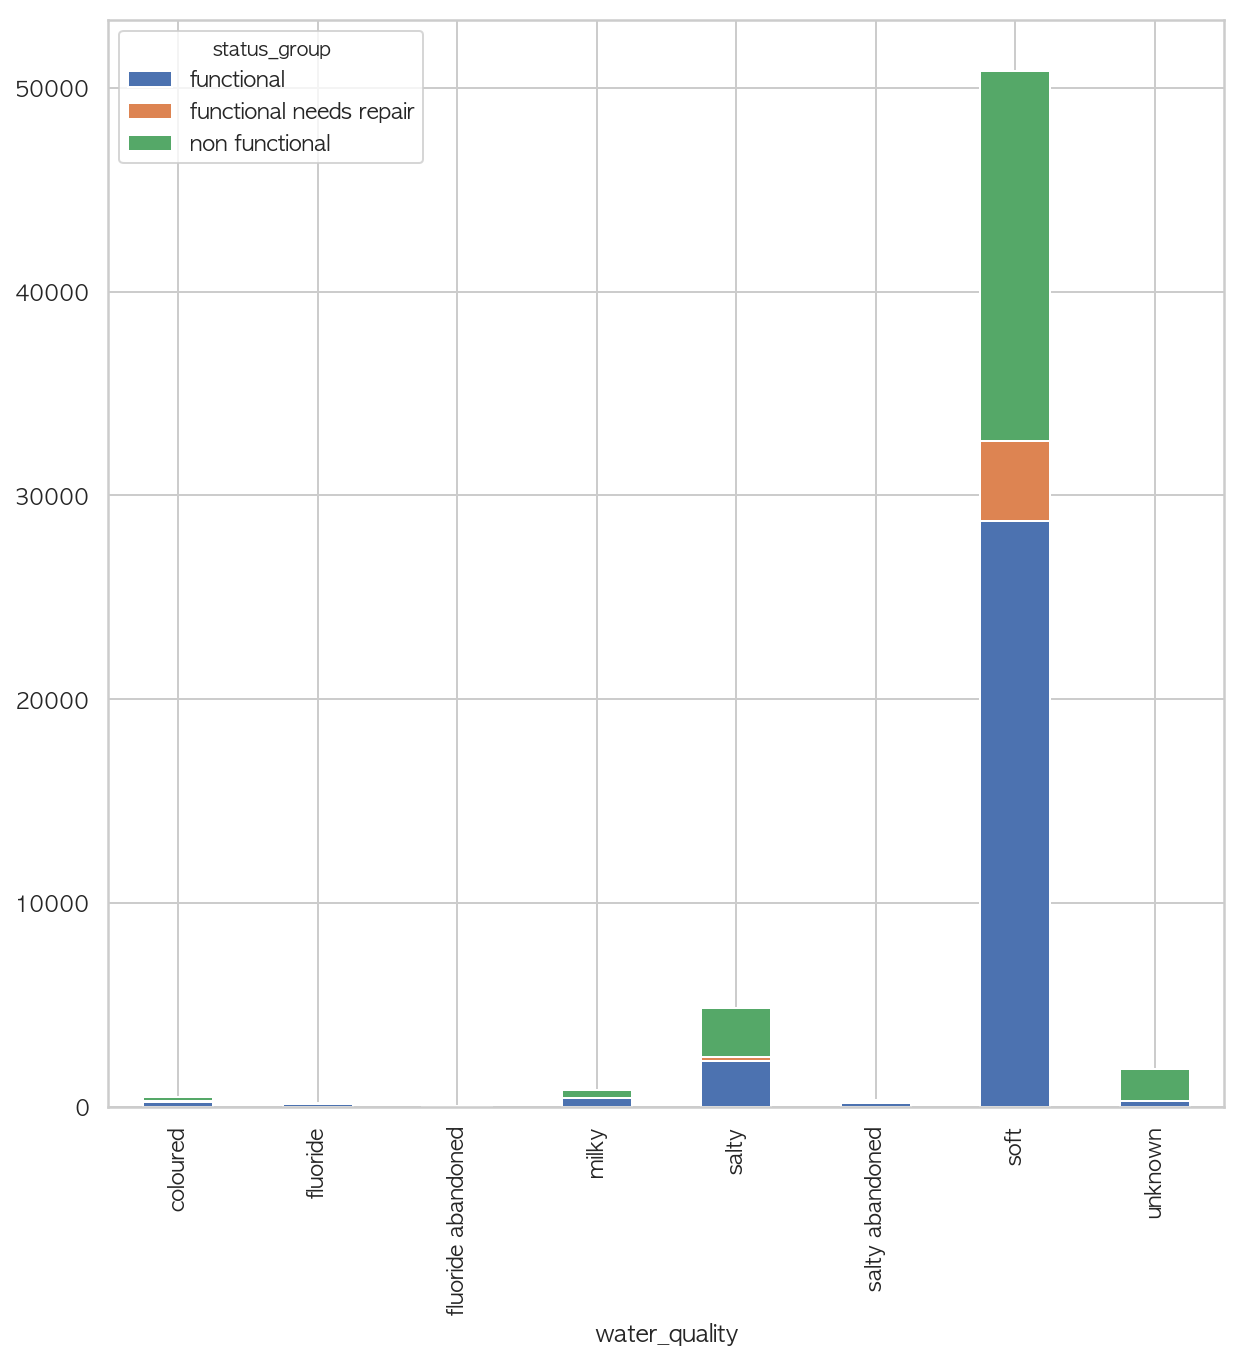

In [185]:
wq = pd.crosstab(index=df.water_quality, columns = df["status_group"])
wq.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

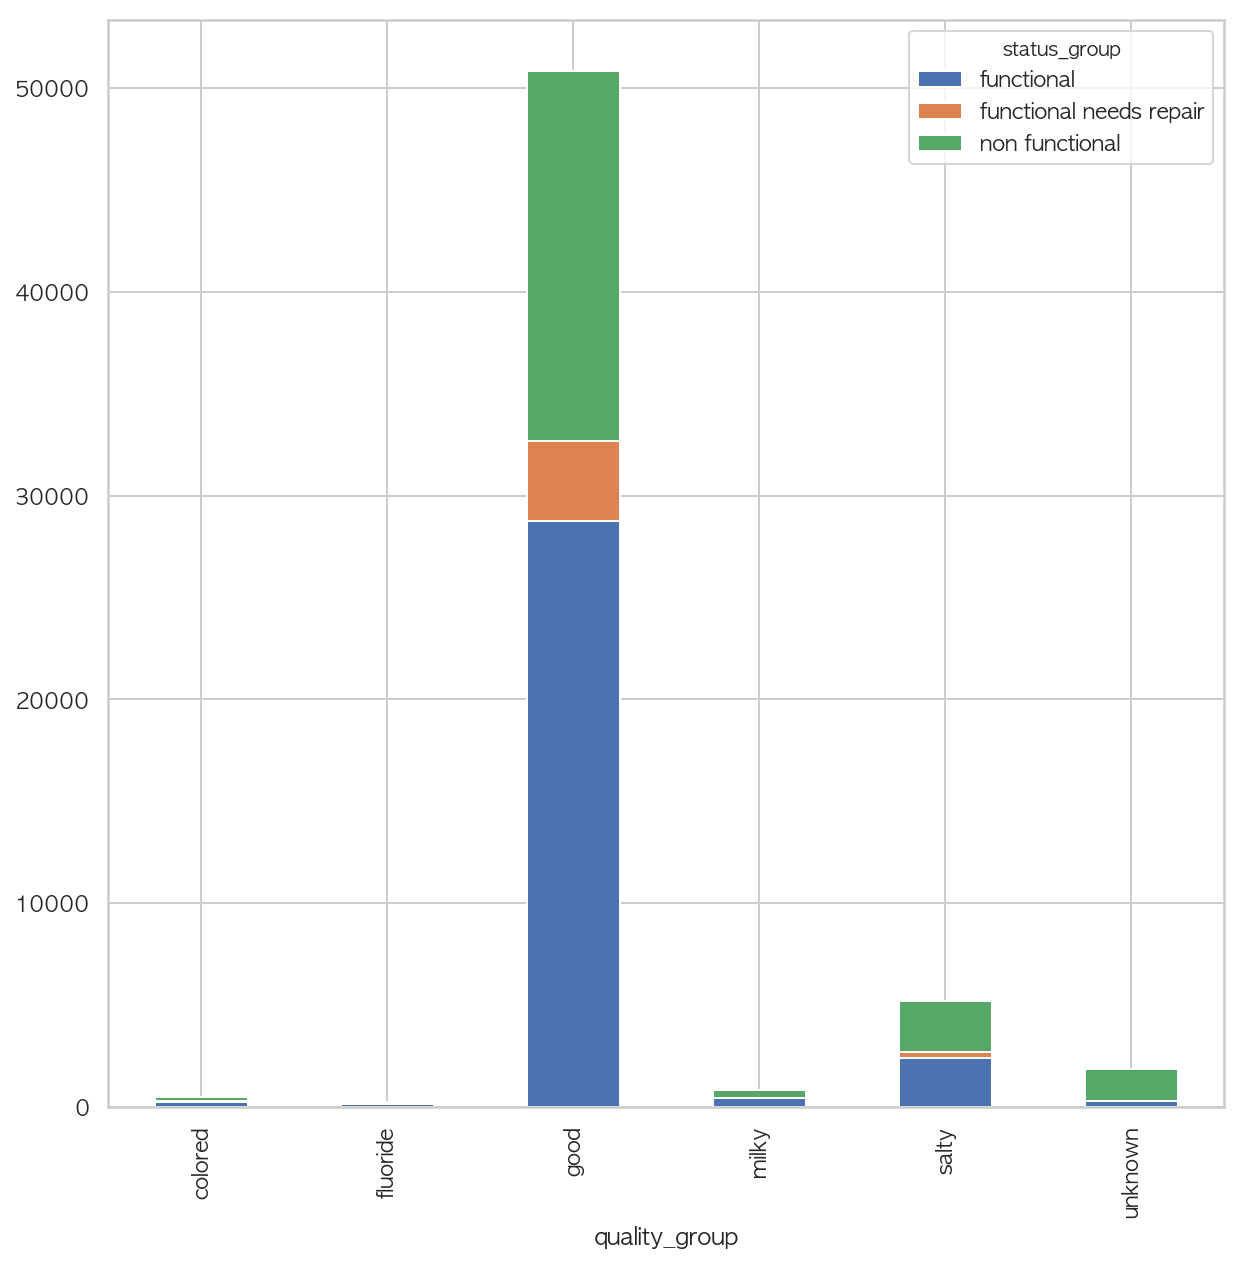

In [186]:
wq = pd.crosstab(index=df.quality_group, columns = df["status_group"])
wq.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

In [189]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["quality_group"]).reshape(-1, 1))
wq_value = enc.transform(np.array(df["quality_group"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
clf.fit(wq_value, y).predict(wq_value)
clf.score(wq_value, y)

0.5646464646464646

- water quality가 naive bayes classifier로 성능이 조금 더 높다
- water quality feature has a slightly higher explanatory power

In [190]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["water_quality"]).reshape(-1, 1))
wq_value = enc.transform(np.array(df["water_quality"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
clf.fit(wq_value, y).predict(wq_value)
clf.score(wq_value, y)

0.5660942760942761

##### quantity & quantity_group duplicates
- 같은 피쳐이므로 둘중 하나만 피쳐로 선택
- They are exactly the same feature. Just chose one to use in the model

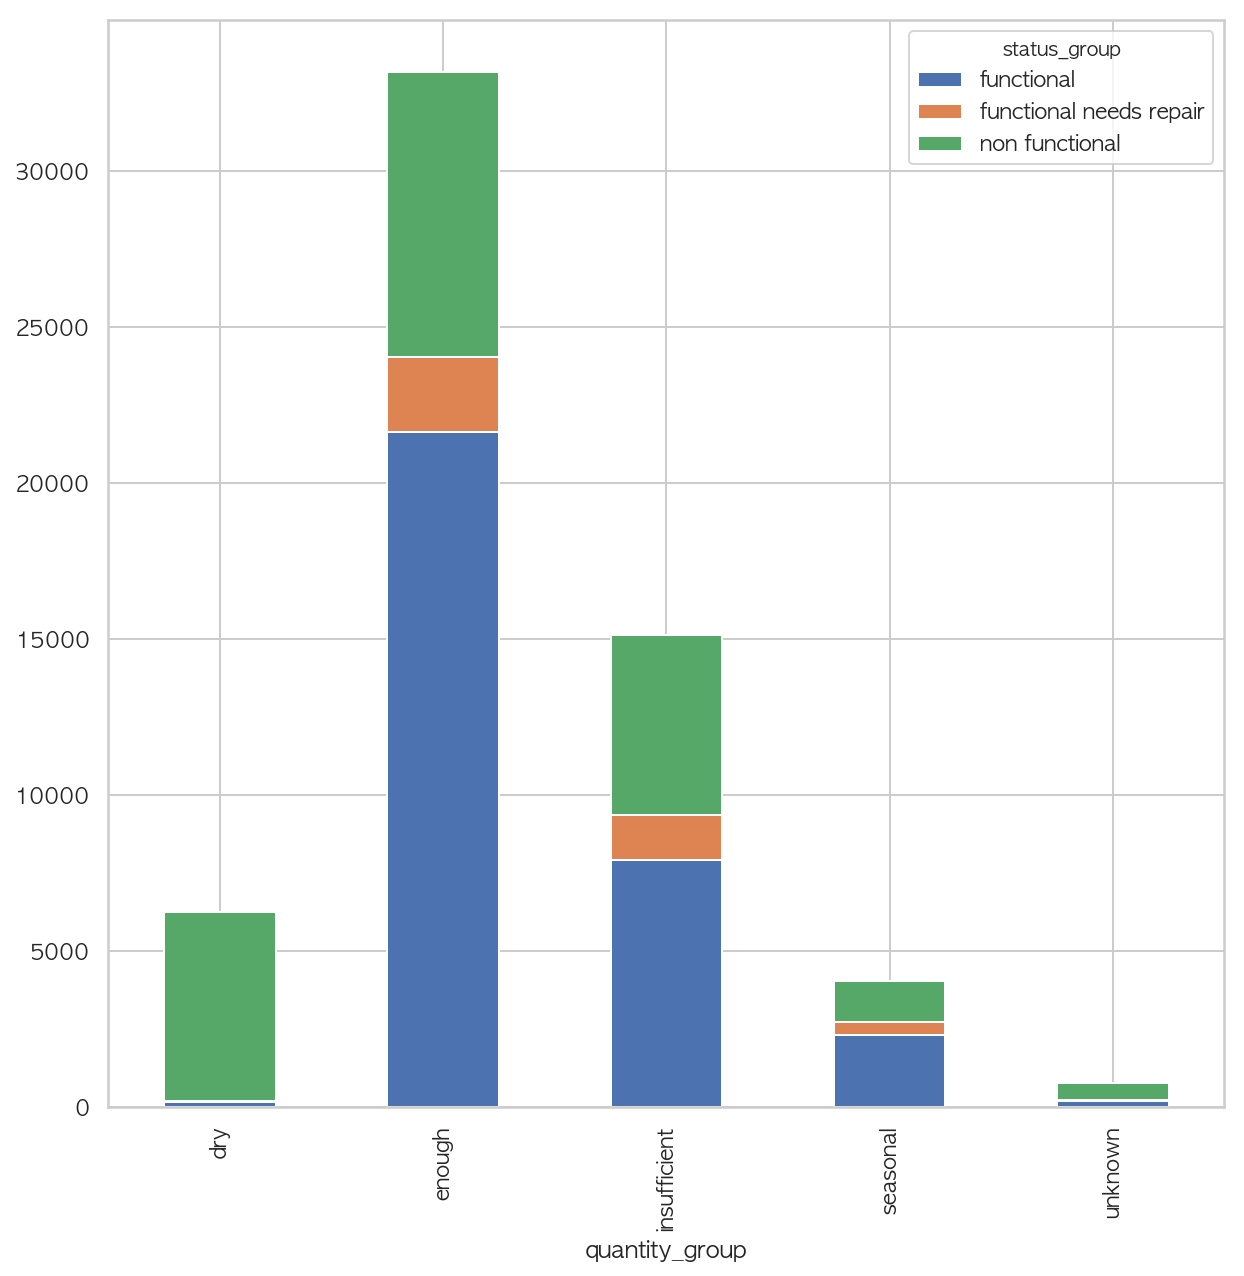

In [196]:
quantity_grp = pd.crosstab(index=df.quantity_group, columns = df["status_group"])
quantity_grp.plot(kind="bar", 
                 figsize=(10,10),
                 stacked=True)

In [122]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["quantity"]).reshape(-1, 1))
qt_value = enc.transform(np.array(df["quantity"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
clf.fit(qt_value, y).predict(qt_value)
clf.score(qt_value, y)

0.6481986531986532

##### source, source_type & source_class duplicates
- 3개의 피쳐 모두 식수 펌프가 어디에서 물을 끌어 올리는지 알려주는 피쳐이다. 조금 더 높은 explanatory power를 가진 `source` 선택
- These three features show where each water pump gets water from. I chose `source` feature since it has a slightly higher explanatory power

In [197]:
# source column
pd.crosstab(index=df.source, columns = df["status_group"])

status_group,functional,functional needs repair,non functional
source,,,
dam,253,24,379
hand dtw,497,17,360
lake,162,12,591
machine dbh,5422,491,5162
other,126,1,85
rainwater harvesting,1386,314,595
river,5465,1221,2926
shallow well,8324,957,7543
spring,10592,1276,5153


- source column has a slightly better expalanatory power than others

In [202]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["source"]).reshape(-1, 1))
s_value = enc.transform(np.array(df["source"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
clf.fit(s_value, y).predict(s_value)
clf.score(s_value, y)

0.5348989898989899

- should drop source_type and source_class features

In [198]:
pd.crosstab(index=df.source_type, columns = df["status_group"])

status_group,functional,functional needs repair,non functional
source_type,,,
borehole,5919,508,5522
dam,253,24,379
other,158,5,115
rainwater harvesting,1386,314,595
river/lake,5627,1233,3517
shallow well,8324,957,7543
spring,10592,1276,5153


In [200]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["source_type"]).reshape(-1, 1))
st_value = enc.transform(np.array(df["source_type"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
clf.fit(st_value, y).predict(st_value)
clf.score(st_value, y)

0.5253703703703704

In [199]:
pd.crosstab(index=df.source_class, columns = df["status_group"])

status_group,functional,functional needs repair,non functional
source_class,,,
groundwater,24835,2741,18218
surface,7266,1571,4491
unknown,158,5,115


In [201]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["source_class"]).reshape(-1, 1))
sc_value = enc.transform(np.array(df["source_class"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
clf.fit(sc_value, y).predict(sc_value)
clf.score(sc_value, y)

0.543080808080808

##### waterpoint_type & waterpoint_type_group:
- 식수 펌프의 종류에 대해 보여준다
- 두 피쳐가 비슷한 피쳐이므로 naive bayes classifier성능이 좀 더 높은 `waterpoint_type`를 선택


- show different water pump types
- chose `waterpoint_type` feature which has a better explanatory power

- 두 피쳐가 비슷하다는 것 확인
- confirm two features are very similar

In [204]:
pd.crosstab(index=df.waterpoint_type, columns = df["status_group"])

status_group,functional,functional needs repair,non functional
waterpoint_type,,,
cattle trough,84,2,30
communal standpipe,17726,2260,8536
communal standpipe multiple,2235,648,3220
dam,6,0,1
hand pump,10805,1029,5654
improved spring,563,85,136
other,840,293,5247


In [7]:
pd.crosstab(index=df.waterpoint_type_group, columns = df["status_group"])

status_group,functional,functional needs repair,non functional
waterpoint_type_group,,,
cattle trough,84,2,30
communal standpipe,19961,2908,11756
dam,6,0,1
hand pump,10805,1029,5654
improved spring,563,85,136
other,840,293,5247


In [207]:
# chi square test to see statistical significance
obs = pd.crosstab(index=df.waterpoint_type_group, columns = df["status_group"])
sp.stats.chi2_contingency(obs)

(6114.774218320656,
 0.0,
 10,
 array([[6.29973737e+01, 8.43050505e+00, 4.45721212e+01],
        [1.88041730e+04, 2.51643308e+03, 1.33043939e+04],
        [3.80156566e+00, 5.08737374e-01, 2.68969697e+00],
        [9.49739717e+03, 1.27097131e+03, 6.71963152e+03],
        [4.25775354e+02, 5.69785859e+01, 3.01246061e+02],
        [3.46485556e+03, 4.63677778e+02, 2.45146667e+03]]))

- waterpoint_type has a slightly better explanatory power

In [12]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["waterpoint_type"]).reshape(-1, 1))
pump_name = enc.transform(np.array(df["waterpoint_type"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
print(cross_val_score(clf, pump_name, y, cv=3))

[0.63343434 0.6369697  0.63116162]


In [11]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array(df["waterpoint_type_group"]).reshape(-1, 1))
pump_name = enc.transform(np.array(df["waterpoint_type_group"]).reshape(-1,1)).toarray()
le = preprocessing.LabelEncoder()
y = le.fit_transform(np.array(df["status_group"]))
clf = BernoulliNB()
print(cross_val_score(clf, pump_name, y, cv=3))

[0.61555556 0.6179798  0.61828283]


## Prediction and Feature Importance

### Base Model - Light GBM
- Light GBM이 학습 속도가 빠르므로, base model을 light GBM으로 설정
- I set a base model with Light GBM since it is fast in training

<img src="img/base_model.png" width="600" height="500" />


- Used Features 사용된 피쳐: 
       ['funder', 'installer', 'basin', 'region_code', 'district_code', 'lga',
       'ward', 'public_meeting', 'permit', 'construction_year',
       'extraction_type_class', 'management', 'payment', 'water_quality',
       'quality_group', 'quantity', 'source_class', 'waterpoint_type',
       'population', 'date_recorded_year', 'season', 'clustered_space']
       
       
- 예상했듯, 데이터 비대칭으로 인해 타겟 값 'functional needs repair'의 점수가 낮음
- Due to data imbalance, the classification score of the target value 'functional needs repair' is very low 
<img src="img/c_matrix_base_model.png" width="500" height="500" />

### Improvement :
- Random Forest Classifier 사용이 큰 성능 향상을 가져옴
- Parameter 튜닝
    - class weight 설정
    - number of estimators : [150, 200, 250]: 200이 가장 큰 성능 향상
- 차원 축소:
    - 빈도수가 낮은 카테고리들을 묶어 데이터의 차원을 줄이려고 해 보았지만, 성능이 나빠졌기에 최종 모델에는 차원을 줄이지 않았다


- Changed to Random Forest Classifier
- parameter tuning:
    - class weight 
    - number of estimators : [150, 200, 250]: 200 was the best result
- dimensionality reduction:
    - I tried reducing dimensionality of feature representations (by combining low freqeuncy categories), but results got worse. Thus, I used all the features for the final model

In [27]:
# used pd.get_dummies to extract all features to see feature importance
df.drop(columns='target', inplace=True)
train = make_meta(df)

In [28]:
# have 16011 columns
len(train.columns)

16011

In [14]:
le = LabelEncoder()
target["status_group_binarized"] = le.fit_transform(target["status_group"])
X_train, X_test, y_train, y_test = train_test_split(train, target["status_group_binarized"],
                                                    stratify= target["status_group_binarized"], 
                                                    test_size=0.25)

In [15]:
rf = RandomForestClassifier(n_estimators=200, 
                             min_samples_split=3, 
                             random_state=42, 
                             n_jobs = 3, 
                             class_weight = {0:0.25, 1: 0.50, 2:0.25})
model = rf.fit(X_train, y_train)

### Check feature importance (first 40 features)
- `get_feature_importance(df)`는 dimension을 final model보다
- 아래의 표에서 가장 중요한 피쳐는 `quantity`, `extraction_type`, `payment`, `waterpoint_type`임을 볼 수 있다

- Most important features are `quantity`, `extraction_type`, `payment`, `waterpoint_type` 

In [4]:
get_feature_importance(df)

,variable,importance
2726,quantity_dry,0.051135
2727,quantity_enough,0.031336
12553,population,0.029793
2740,waterpoint_type_other,0.022413
2689,extraction_type_class_other,0.019552
2728,quantity_insufficient,0.016762
2705,payment_never pay,0.014941
2735,waterpoint_type_communal standpipe,0.014177
2686,extraction_type_class_gravity,0.010184
2687,extraction_type_class_handpump,0.009629


#### sklearn pipeline model construction
```
imputer_cat = ('imputer_cat', SimpleImputer(strategy="most_frequent"))
ohe_cat = ('ohe', OneHotEncoder(sparse=False,
                    handle_unknown='ignore'))
cat_steps = [imputer_cat, ohe_cat]
cat_pipe = Pipeline(cat_steps)

cat_cols = []
for col in train.columns:
    if hasattr(train[col], 'cat'):
        cat_cols.append(col)
num_cols = ['population']

cat_transformers = [('cat', cat_pipe, cat_cols)]
ct = ColumnTransformer(transformers=cat_transformers)

imputer_num = ('imputer_num', SimpleImputer(strategy="median"))
num_steps = [imputer_num]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, num_cols)]

transformers = [('cat', cat_pipe, cat_cols),('num', num_pipe, num_cols)]
ct = ColumnTransformer(transformers=transformers)

imputer_num = ('imputer_num', SimpleImputer(strategy="median"))
num_steps = [imputer_num]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, num_cols)]

transformers = [('cat', cat_pipe, cat_cols),('num', num_pipe, num_cols)]
ct = ColumnTransformer(transformers=transformers)


ml_pipe = Pipeline([('transform', ct), \
                    ('clf', RandomForestClassifier(n_estimators=200, 
                                                   min_samples_split=3, 
                                                   random_state=412, 
                                                   n_jobs = 3, 
                                                   class_weight = {0:0.25, 1: 0.5, 2:0.25}))])
```

## Conclusion

**식수 펌프 고유 특성과 사후 관리의 중요성**
- 무엇보다 가장 중요한 피쳐들은 식수 펌프를 제작할 때 쓰여지는 금속의 종류, 식수 펌프가 가져올 수 있는 물의 양, 펌프의 종류와 같은 펌프의 고유한 특성을 보여주는 피쳐들과 사후 관리의 중요성을 보여주는 피쳐인 `payment`가 있었다. `payment` 피쳐는 얼마나 국제 기구, 정부, 구호단체가 지속적으로 식수 펌프를 관리하는데 있어서 적극적인지를 보여주는 피쳐였다.

**해결 방법은?**
- 자금 낭비만 되는 무분별한 식수 사업을 피하기 위해 국제기구, 정부 및 구호단체들은 식수 펌프를 짓는 데에만 신경을 쓰는 것이 아닌 지속적인 관리가 필요성을 알아야 한다. 다양한 기술의 발달로 모니터링을 할 수 있는 방법이 모색되고 있다 [출처: the Guardian](https://www.theguardian.com/society/katineblog/2009/mar/26/water-projects-wasted-money). 데이터를 제공한 Taarifa 또한 크라우드 소싱 리포팅 오픈 소스 플랫폼으로 식수 펌프 모니터링을 쉽고 편리하게 할 수 있는 도구이다. 지속적인 관리가 힘든 상황인 경우, 지역 사람들에게 식수 펌프의 간단한 수리 방법을 교육시키고 펌프가 고장 났을 경우 알릴 수 있는 방법 또한 모색되어야 한다.

**아쉬운 점 : decision tree model의 단점**
- one-hot encoding으로 모든 카테고리 데이터를 바꾸어 주어 데이터의 차원이 크게 증가하여 training시간이 오래 걸렸고, parameter tuning을 마음껏 해보지 못함에 대한 아쉬움이 남는다.
- Sparsity로 인해 EDA를 할 때 `population` 피쳐는 큰 설명력이 없었음에도 불구하고 연속변수라는 이유로 피쳐 중요성에서 높은 점수를 받았다. 

**type of water pump and importance of sustainable maintenance**
- The most important features in predicting whether a water pump is faulty or not are water pump's type and quantity of water a pump has access to. Then, there is `payment` feature which shows how committed international organizations/ NGOs/ government/ stakeholders are to maintaining functional water pumps. 


**solution?**
- Without taking into account local situation and installing low quality water pumps, international organizations/ NGOs/ government/ stakeholders would keep wasting money without actually helping those in need. Thanks to fastly growing technology, various monitoring methods are considered [reference: the Guardian](https://www.theguardian.com/society/katineblog/2009/mar/26/water-projects-wasted-money). If sustainable maintenance is not affordable, local people should be educated on different methods on fixing common issues of malfunctioning water pumps. Moreover, if possible, local people should also be provided with contact number of 'go-to-person' or 'go-to-organization' if water pump malfunctions. 

**reflection: disadvantages of decision tree models** 
- One-hot encoding led to a huge increase in the dimensionality of the feature representations. It took a long time to train a prediction model. This prevented me from trying out various parameter values to optimize the model. 
- The high sparsity of the model resulted in the only continuous variable of the data `population` being assigned higher feature importance, although I was not able to see strong correlation between `population` and the target. 